In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import interp
import math
from itertools import cycle

# for plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# for machine learning
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

#from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from collections import Counter
from sklearn.pipeline import Pipeline

# for assessment
from sklearn import metrics

# for Dimensionality reduction
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,f_regression,SelectPercentile,VarianceThreshold
import scipy.stats as sp

# fix random state
random_state = np.random.RandomState(0)

# for LOO
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# silence warnings
import warnings
warnings.filterwarnings('ignore')

# for assessment
from sklearn import metrics
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load our private dataset

In [2]:
# import data T2
dT2_FirstOrdered = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_T2/UTokyoSarcomaChondrosarcoma_FirstOrdered_T2.txt', delim_whitespace=True,header=0)
dT2_ShapeSize= pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_T2/UTokyoSarcomaChondrosarcoma_ShapeSize_T2.txt', sep=' ',header=0)

dT2_16GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_16GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_16GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_16NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_16NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_32GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_32GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_32GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_32NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_32NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_64GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_64GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_64GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_64NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_64NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_128GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_128GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_128GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_128NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_128NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

# import data GD
dGD_FirstOrdered = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_GD/UTokyoSarcomaChondrosarcoma_FirstOrdered_GD.txt', delim_whitespace=True,header=0)
dGD_ShapeSize = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_GD/UTokyoSarcomaChondrosarcoma_ShapeSize_GD.txt', delim_whitespace=True,header=0)
dGD_16GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_16GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_16GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_16NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_16NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_32GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_32GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_32GLSZM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_32NGLDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_32NGTDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_64GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_64GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_64GLSZM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_64NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_64NGTDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_128GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_128GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_128GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_128NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_128NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

In [3]:
dT2_FirstOrdered.to_csv("dT2_FirstOrdered.csv")
dT2_ShapeSize.to_csv("dT2_ShapeSize.csv")

dT2_16GLCM.to_csv("dT2_16GLCM.csv")
dT2_16GLRLM.to_csv("dT2_16GLRLM.csv")
dT2_16GLSZM .to_csv("dT2_16GLSZM .csv")
dT2_16NGLDM.to_csv("dT2_16NGLDM.csv")
dT2_16NGTDM.to_csv("dT2_16NGTDM.csv")

dT2_32GLCM.to_csv("dT2_32GLCM.csv")
dT2_32GLRLM.to_csv("dT2_32GLRLM.csv")
dT2_32GLSZM .to_csv("dT2_32GLSZM .csv")
dT2_32NGLDM.to_csv("dT2_32NGLDM.csv")
dT2_32NGTDM.to_csv("dT2_32NGTDM.csv")

dT2_64GLCM.to_csv("dT2_64GLCM.csv")
dT2_64GLRLM.to_csv("dT2_64GLRLM.csv")
dT2_64GLSZM.to_csv("dT2_64GLSZM.csv")
dT2_64NGLDM.to_csv("dT2_64NGLDM.csv")
dT2_64NGTDM.to_csv("dT2_64NGTDM.csv")

dT2_128GLCM.to_csv("dT2_128GLCM.csv")
dT2_128GLRLM.to_csv("dT2_128GLRLM.csv")
dT2_128GLSZM.to_csv("dT2_128GLSZM.csv")
dT2_128NGLDM.to_csv("dT2_128NGLDM.csv")
dT2_128NGTDM.to_csv("dT2_128NGTDM.csv")


dGD_FirstOrdered.to_csv("dGD_FirstOrdered.csv")
dGD_ShapeSize.to_csv("dGD_ShapeSize.csv")

dGD_16GLCM.to_csv("dGD_16GLCM.csv")
dGD_16GLRLM.to_csv("dGD_16GLRLM.csv")
dGD_16GLSZM.to_csv("dGD_16GLSZM.csv")
dGD_16NGLDM.to_csv("dGD_16NGLDM.csv")
dGD_16NGTDM.to_csv("dGD_16NGTDM.csv")

dGD_32GLCM.to_csv("dGD_32GLCM.csv")
dGD_32GLRLM.to_csv("dGD_32GLRLM.csv")
dGD_32GLSZM.to_csv("dGD_32GLSZM.csv")
dGD_32NGLDM.to_csv("dGD_32NGLDM.csv")
dGD_32NGTDM.to_csv("dGD_32NGTDM.csv")

dGD_64GLCM.to_csv("dGD_64GLCM.csv")
dGD_64GLRLM.to_csv("dGD_64GLRLM.csv")
dGD_64GLSZM.to_csv("dGD_64GLSZM.csv")
dGD_64NGLDM.to_csv("dGD_64NGLDM.csv")
dGD_64NGTDM.to_csv("dGD_64NGTDM.csv")

dGD_128GLCM.to_csv("dGD_128GLCM.csv")
dGD_128GLRLM.to_csv("dGD_128GLRLM.csv")
dGD_128GLSZM.to_csv("dGD_128GLSZM.csv")
dGD_128NGLDM.to_csv("dGD_128NGLDM.csv")
dGD_128NGTDM.to_csv("dGD_128NGTDM.csv")


In [4]:
print(dGD_FirstOrdered .shape)

(57, 344)


In [5]:
dGD_FirstOrdered 

,Num,Dnum,ROIMax,ROIMin,ROIMean,ROIMedian,ROIRange,ROIVariance,ROISkewness,ROIKurtosis,...,HHHhistrMeanAD,HHHhistMedianAD,HHHhistCV,HHHhistQCD,HHHEntropy,HHHUniformity,HHHhistMaxGrad,HHHhistMaxGradGL,HHHhistMinGrad,HHHhistMinGradGL
0,1,1,2.499625,-0.592224,0.656376,0.628206,3.091848,0.187756,0.727329,1.381769,...,4.166885,5.974343,0.249722,0.142857,4.963322,0.039611,16.5,28.0,-14.5,37.0
1,2,3,4.735702,-0.430916,1.299757,1.192933,5.166618,0.398587,0.810418,0.997723,...,2.215418,3.383188,0.141692,0.076923,4.195950,0.070438,495.5,30.0,-461.5,36.0
2,3,4,3.425515,-0.698990,1.366895,1.383131,4.124505,0.200642,-0.388754,1.633911,...,4.107168,6.009403,0.232674,0.130435,4.994613,0.038995,22.0,30.0,-25.5,39.0
3,4,5,3.705573,-0.637984,0.807321,0.733199,4.343557,0.262877,1.502555,3.964999,...,2.621285,3.671631,0.173806,0.103448,4.309844,0.064960,219.5,25.0,-214.0,32.0
4,5,6,3.736411,-0.781488,1.936131,2.072516,4.517898,0.466587,-0.719224,0.206369,...,2.083440,2.904740,0.134303,0.068966,3.969270,0.080959,837.5,27.0,-927.0,32.0
5,6,7,3.420178,-0.477783,0.975017,0.906282,3.897961,0.173634,1.200564,3.330373,...,2.419399,3.396546,0.164985,0.087719,4.199277,0.071073,321.0,26.0,-354.5,31.0
6,7,8,3.274145,-0.691645,1.270886,1.233808,3.965790,0.303713,0.048450,-0.223767,...,2.266708,3.040560,0.139951,0.084746,4.035769,0.076825,1525.5,27.0,-1573.0,32.0
7,8,9,3.468542,-0.460158,1.480343,1.499003,3.928699,0.352250,-0.073398,-0.342881,...,2.282923,3.260928,0.161129,0.094340,4.127137,0.070972,212.5,24.0,-206.0,30.0
8,9,10,4.084582,-0.669266,1.102071,1.001017,4.753848,0.258982,1.342494,2.571437,...,1.382817,1.845245,0.087183,0.047619,3.325407,0.131984,1079.5,30.0,-1196.0,33.0
9,10,11,4.148924,-0.903397,1.443074,1.422793,5.052320,0.333703,0.139228,-0.106534,...,2.034653,2.917521,0.115409,0.072464,3.975884,0.081496,2304.0,32.0,-2139.0,36.0


In [6]:
print(dGD_ShapeSize.shape)

(57, 10)


In [7]:
dGD_ShapeSize

,Num,Dnum,Compactness1,Compactness2,Max3Ddiameter,SpheDisproportion,Sphericity,SurfaceArea,SVratio,Volume
0,1,1,14.159714,2.202129,22.0,0.768633,1.301011,508.067063,0.317939,1598.0
1,2,3,59.493140,1.327301,43.0,0.909935,1.098980,3854.251188,0.148686,25922.0
2,3,4,19.714866,1.887235,24.0,0.809204,1.235782,829.121933,0.268846,3084.0
3,4,5,40.397352,1.544648,33.0,0.865081,1.155961,2211.500792,0.181957,12154.0
4,5,6,78.536584,1.894066,49.0,0.808230,1.237271,4345.209737,0.117226,37067.0
5,6,7,47.547991,1.385504,39.0,0.897010,1.114815,2870.484594,0.168634,17022.0
6,7,8,103.008293,1.114213,65.0,0.964593,1.036707,8272.314785,0.110772,74679.0
7,8,9,40.051617,1.818929,31.0,0.819209,1.220690,1984.339321,0.177015,11210.0
8,9,10,59.139481,2.824554,41.0,0.707430,1.413568,2432.453065,0.128301,18959.0
9,10,11,120.865165,1.439704,69.0,0.885609,1.129166,8593.275247,0.095612,89877.0


In [8]:
print(dGD_16GLCM .shape)

(57, 101)


In [9]:
dGD_16GLCM 

,Num,Dnum,ROIGEnergy,ROIGContrast,ROIGEntropy,ROIGHomogeneity1,ROIGHomogeneity2,ROIGCorrelation,ROIGSumAverage,ROIGVariance,...,HHHGContrast,HHHGEntropy,HHHGHomogeneity1,HHHGHomogeneity2,HHHGCorrelation,HHHGSumAverage,HHHGVariance,HHHGDissimilarity,HHHGAutoCorrelation,HHHGCorrelation1
0,1,1,0.032437,3.339404,5.735950,0.571285,0.527538,0.643006,0.032048,0.018302,...,10.840707,6.491113,0.402287,0.319417,-0.005275,0.033350,0.021065,2.549425,72.861599,17039.256704
1,2,3,0.028775,3.459165,5.916933,0.583053,0.540880,0.706986,0.031593,0.023057,...,10.206918,6.363522,0.423769,0.345410,-0.011368,0.033175,0.019711,2.406023,72.071022,14838.092665
2,3,4,0.022305,5.127626,6.129828,0.504949,0.445033,0.479767,0.034028,0.019258,...,11.568793,6.559736,0.400914,0.317548,-0.015049,0.033111,0.022250,2.613978,71.759676,17422.602659
3,4,5,0.035545,2.710880,5.513425,0.600572,0.564531,0.684501,0.031170,0.016785,...,9.867405,6.331741,0.424899,0.346512,-0.003631,0.033176,0.019205,2.373891,72.114236,14551.589904
4,5,6,0.025160,2.916736,5.891455,0.584672,0.544022,0.769011,0.035786,0.024662,...,10.495135,6.432270,0.412766,0.331513,-0.010613,0.033211,0.020283,2.477015,72.227482,15942.187351
5,6,7,0.031111,3.557716,5.760499,0.560881,0.514405,0.602401,0.032899,0.017475,...,9.842318,6.318050,0.426224,0.347996,-0.011497,0.033261,0.019005,2.369689,72.445878,14444.224715
6,7,8,0.022264,2.882658,5.995372,0.578321,0.535663,0.762438,0.033453,0.023699,...,10.877744,6.484983,0.410449,0.329161,-0.010731,0.033201,0.021020,2.519281,72.184794,16580.731363
7,8,9,0.015580,5.325766,6.425049,0.486805,0.421065,0.576632,0.033131,0.024563,...,11.638264,6.596981,0.399958,0.316271,-0.006657,0.033120,0.022578,2.630217,71.849559,18107.526462
8,9,10,0.031947,3.540936,5.679189,0.567360,0.522126,0.618617,0.032285,0.018136,...,8.808763,6.136981,0.441738,0.367366,-0.011014,0.033177,0.017018,2.221371,72.089343,12524.339997
9,10,11,0.023343,2.628112,5.944998,0.594834,0.555236,0.786196,0.033145,0.024007,...,10.443917,6.409583,0.417921,0.338256,-0.012948,0.033212,0.020138,2.454318,72.220270,15371.472926


In [10]:
print(dGD_16GLRLM.shape)

(57, 119)


In [11]:
dGD_16GLRLM

,Num,Dnum,ROISRE,ROILRE,ROIGLN,ROIRLN,ROIRP,ROILGRE,ROIHGRE,ROISRLGE,...,HHHRLN,HHHRP,HHHLGRE,HHHHGRE,HHHSRLGE,HHHSRHGE,HHHLRLGE,HHHLRHGE,HHHGLV,HHHRLV
0,1,1,0.833401,2.122845,0.115925,0.648961,0.772421,0.022101,76.882333,0.018949,...,0.818004,0.897556,0.021942,79.324956,0.020715,73.549024,0.027861,107.478983,0.065472,0.000873
1,2,3,0.801449,2.627720,0.115287,0.597213,0.722443,0.022991,75.375575,0.018704,...,0.772254,0.865756,0.022645,77.886405,0.021073,70.502650,0.030943,117.456563,0.039921,0.000562
2,3,4,0.869346,1.746019,0.122243,0.711779,0.825979,0.026146,80.323673,0.023779,...,0.810261,0.892381,0.022418,78.078203,0.021092,72.190967,0.028900,107.226658,0.062571,0.000863
3,4,5,0.786770,2.593085,0.132398,0.574764,0.716206,0.020574,73.618571,0.016281,...,0.775278,0.867145,0.022873,77.825078,0.021336,70.543198,0.031029,117.220162,0.049457,0.000690
4,5,6,0.792261,2.543439,0.110674,0.583068,0.722428,0.022470,85.675295,0.018970,...,0.779928,0.871788,0.022033,78.043997,0.020523,70.938818,0.029829,115.190187,0.048708,0.000677
5,6,7,0.819614,2.259189,0.131532,0.626133,0.756397,0.019633,76.877823,0.016349,...,0.771917,0.866048,0.021793,77.924432,0.020232,70.501024,0.029952,117.468616,0.050402,0.000709
6,7,8,0.797280,2.482059,0.109619,0.590863,0.729601,0.021806,79.031766,0.017889,...,0.781166,0.872047,0.022179,78.128879,0.020668,71.039479,0.030018,115.509347,0.048158,0.000667
7,8,9,0.867164,1.738301,0.107013,0.707644,0.825497,0.021978,78.573725,0.019431,...,0.795730,0.882523,0.023274,77.991936,0.021856,71.455044,0.030372,111.279824,0.054142,0.000740
8,9,10,0.811896,2.340302,0.133475,0.613657,0.746023,0.017188,79.136263,0.013640,...,0.758679,0.855666,0.020701,77.169182,0.019075,69.315981,0.029552,120.622031,0.051742,0.000743
9,10,11,0.784285,2.756043,0.111463,0.571017,0.706692,0.019835,80.126734,0.015548,...,0.772971,0.865599,0.022094,78.098289,0.020527,70.741146,0.030437,117.936982,0.033239,0.000469


In [12]:
print(dGD_16GLSZM.shape)

(57, 119)


In [13]:
dGD_16GLSZM

,Num,Dnum,ROISZE,ROILZE,ROIszGLN,ROIZSN,ROIZP,ROILGZE,ROIHGZE,ROISZLGE,...,HHHZSN,HHHZP,HHHLGZE,HHHHGZE,HHHSZLGE,HHHSZHGE,HHHLZLGE,HHHLZHGE,HHHzGLV,HHHZLV
0,1,1,0.600169,1765.089744,0.077745,0.336949,0.098734,0.032283,104.320513,0.016631,...,0.426955,0.225806,0.037120,89.453782,0.029494,61.717503,7.726119,3.913872e+04,0.000821,0.000367
1,2,3,0.550886,45185.660498,0.076719,0.285861,0.054659,0.040221,88.873310,0.023593,...,0.453351,0.172485,0.045366,86.844742,0.036546,62.020841,204.476501,1.060871e+06,0.000040,0.000043
2,3,4,0.558661,2653.981013,0.076029,0.294524,0.103947,0.056035,79.977848,0.034589,...,0.439608,0.224149,0.037708,88.439416,0.029690,62.052336,15.547958,7.454114e+04,0.000366,0.000182
3,4,5,0.540121,30158.095082,0.084101,0.280532,0.051174,0.022301,119.908197,0.010671,...,0.455162,0.179340,0.045920,86.306369,0.037195,62.171415,94.201696,4.839240e+05,0.000091,0.000086
4,5,6,0.519803,97693.685994,0.082656,0.257143,0.036096,0.068961,63.859187,0.039104,...,0.445059,0.168665,0.043736,88.576008,0.035507,62.536989,292.039072,1.493228e+06,0.000033,0.000032
5,6,7,0.523271,30130.596413,0.076341,0.262244,0.053286,0.035400,92.004484,0.019900,...,0.443458,0.170077,0.042032,87.115749,0.033218,61.937289,145.733013,7.515234e+05,0.000062,0.000068
6,7,8,0.493420,202064.082492,0.076920,0.234224,0.031893,0.045500,79.252104,0.022427,...,0.434896,0.167893,0.043923,87.095495,0.035050,60.696696,584.355542,2.993949e+06,0.000015,0.000016
7,8,9,0.554878,12199.684347,0.077173,0.289005,0.068993,0.043482,78.357050,0.026314,...,0.457525,0.184066,0.046780,86.411334,0.038471,61.764424,74.308004,3.701362e+05,0.000106,0.000085
8,9,10,0.548011,38948.740038,0.090001,0.282520,0.056466,0.017786,120.907021,0.010041,...,0.451919,0.165170,0.039218,85.572677,0.031079,60.816291,183.423425,9.328212e+05,0.000052,0.000068
9,10,11,0.545006,256196.379500,0.077998,0.279178,0.030347,0.033911,92.163115,0.019347,...,0.450598,0.168044,0.043441,88.218268,0.034886,62.472516,753.084771,3.828834e+06,0.000012,0.000013


In [14]:
print(dGD_16NGLDM.shape)

(57, 146)


In [15]:
dGD_16NGLDM

,Num,Dnum,ROILDE,ROIHDE,ROILGLE,ROIHGLE,ROILDLGLE,ROILDHGLE,ROIHDLGLE,ROIHDHGLE,...,HHHHDLGLE,HHHHDHGLE,HHHdepGLN,HHHdepGLNN,HHHDN,HHHDNN,HHHdepGLV,HHHDV,HHHDEntropy,HHHDEnergy
0,1,1,0.102848,68.508861,0.021304,74.539873,0.002761,9.960512,1.239932,4457.565190,...,0.277916,1328.631246,193.904491,0.122647,234.724225,0.148466,5.743732,4.301419,5.829893,0.020986
1,2,3,0.066919,95.803268,0.022691,71.755495,0.002164,5.717873,2.148115,5484.222953,...,0.420501,2020.590563,3398.139919,0.132849,2980.257203,0.116512,5.256178,7.126330,6.062405,0.018044
2,3,4,0.110855,41.938158,0.024658,80.335197,0.005273,8.631603,0.675669,3364.522039,...,0.316458,1423.535668,376.714005,0.123270,424.415576,0.138879,5.829490,4.958392,5.944083,0.019587
3,4,5,0.059672,93.324664,0.020446,70.144463,0.001245,6.223999,1.887179,5491.766275,...,0.410073,2002.570952,1595.856095,0.133055,1396.126897,0.116402,5.182624,6.988138,6.028228,0.018310
4,5,6,0.050750,89.276644,0.020696,88.525536,0.002352,3.593744,1.329233,8886.764834,...,0.381624,1836.135980,4720.450182,0.128893,4509.646752,0.123137,5.321458,5.879171,6.000913,0.018955
5,6,7,0.066680,73.545520,0.019296,74.517264,0.001863,5.817792,1.354483,4672.039964,...,0.409736,2020.440315,2290.974945,0.136669,1949.654537,0.116307,4.995963,6.813361,6.013203,0.018742
6,7,8,0.047690,85.246745,0.021061,78.658850,0.001534,3.769807,1.598653,6515.589747,...,0.384865,1858.355811,9396.615370,0.127136,9153.290191,0.123844,5.453653,6.138762,6.040185,0.018393
7,8,9,0.090462,39.961264,0.021446,78.710104,0.003008,6.939035,0.742030,3189.740271,...,0.342950,1617.769175,1364.971765,0.122738,1479.302491,0.133019,5.757550,5.178751,6.007022,0.018737
8,9,10,0.068945,79.344905,0.017725,74.890068,0.001153,7.335215,1.611306,4568.725276,...,0.460697,2280.311411,2733.472463,0.146159,2022.451396,0.108141,4.525459,8.150091,5.991470,0.019013
9,10,11,0.046395,100.281588,0.020091,78.312726,0.001214,3.999389,2.220123,7103.774168,...,0.419360,2023.579405,11651.417667,0.131213,10402.139508,0.117144,5.289026,7.108650,6.050495,0.018257


In [16]:
print(dGD_16NGTDM.shape)

(57, 47)


In [17]:
dGD_16NGTDM

,Num,Dnum,ROICoarseness,ROIContrast,ROIBusyness,ROIComplexity,ROIStrength,LLLCoarseness,LLLContrast,LLLBusyness,...,HHLCoarseness,HHLContrast,HHLBusyness,HHLComplexity,HHLStrength,HHHCoarseness,HHHContrast,HHHBusyness,HHHComplexity,HHHStrength
0,1,1,0.007062,0.041892,0.990360,86.179679,0.642487,0.009668,0.033826,0.759714,...,0.004091,0.078427,1.535771,173.420189,0.306769,0.004015,0.092225,1.659407,190.222563,0.283591
1,2,3,0.000486,0.041119,15.669277,79.489687,0.043927,0.000664,0.025914,10.579975,...,0.000271,0.070452,23.202624,165.524988,0.019721,0.000260,0.078870,24.565646,176.981371,0.018416
2,3,4,0.003127,0.049106,2.014849,107.039286,0.264096,0.004219,0.036280,1.521532,...,0.002137,0.085153,3.114288,179.829931,0.154120,0.002130,0.093881,3.185423,188.372449,0.146732
3,4,5,0.000993,0.029173,6.840579,76.461567,0.098430,0.001350,0.020757,4.869843,...,0.000585,0.070898,10.739888,165.871297,0.042105,0.000554,0.076792,11.461158,175.866157,0.039662
4,5,6,0.000367,0.039621,16.095374,76.646953,0.033926,0.000522,0.033044,11.226926,...,0.000186,0.079687,34.997718,174.172454,0.013204,0.000178,0.081239,36.478324,181.825144,0.012673
5,6,7,0.000635,0.033027,10.271274,85.988212,0.060702,0.000855,0.024157,7.636179,...,0.000419,0.074537,15.265525,164.872713,0.029995,0.000399,0.072918,15.677854,174.139284,0.028607
6,7,8,0.000181,0.037698,40.361230,75.947098,0.016213,0.000252,0.026819,29.222505,...,0.000093,0.080181,70.329154,174.383010,0.006568,0.000089,0.084064,73.313411,182.857870,0.006251
7,8,9,0.000912,0.056215,7.808998,107.076212,0.075967,0.001266,0.040468,5.647035,...,0.000605,0.088494,11.114752,181.178958,0.042448,0.000588,0.091162,11.375094,186.049883,0.040902
8,9,10,0.000576,0.034064,11.672293,87.889277,0.056081,0.000789,0.027872,9.348610,...,0.000370,0.067202,16.839338,165.303398,0.027063,0.000360,0.062384,16.808718,166.906232,0.026661
9,10,11,0.000157,0.036077,45.913184,72.515180,0.014074,0.000219,0.025498,32.711457,...,0.000079,0.073274,80.380814,167.443657,0.005614,0.000075,0.080089,85.514124,179.552938,0.005263


In [18]:
# check number of columns and rows
print(dT2_FirstOrdered.shape)
print(dT2_ShapeSize.shape)
print(dT2_16GLCM.shape, dT2_16GLRLM.shape, dT2_16GLSZM.shape, dT2_16NGLDM.shape, dT2_16NGTDM.shape)
print(dT2_32GLCM.shape, dT2_32GLRLM.shape, dT2_32GLSZM.shape, dT2_32NGLDM.shape, dT2_32NGTDM.shape)
print(dT2_64GLCM.shape, dT2_64GLRLM.shape, dT2_64GLSZM.shape, dT2_64NGLDM.shape, dT2_64NGTDM.shape)
print(dT2_128GLCM.shape, dT2_128GLRLM.shape, dT2_128GLSZM.shape, dT2_128NGLDM.shape, dT2_128NGTDM.shape)

# check number of columns and rows
print(dGD_FirstOrdered.shape)
print(dGD_ShapeSize.shape)
print(dGD_16GLCM.shape, dGD_16GLRLM.shape, dGD_16GLSZM.shape, dGD_16NGLDM.shape, dGD_16NGTDM.shape)
print(dGD_32GLCM.shape, dGD_32GLRLM.shape, dGD_32GLSZM.shape, dGD_32NGLDM.shape, dGD_32NGTDM.shape)
print(dGD_64GLCM.shape, dGD_64GLRLM.shape, dGD_64GLSZM.shape, dGD_64NGLDM.shape, dGD_64NGTDM.shape)
print(dGD_128GLCM.shape, dGD_128GLRLM.shape, dGD_128GLSZM.shape, dGD_128NGLDM.shape, dGD_128NGTDM.shape)

(57, 344)
(57, 10)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 344)
(57, 10)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)


In [19]:
# change rownames
dT2_FirstOrdered.index=dT2_FirstOrdered['Dnum']
dT2_ShapeSize.index=dT2_ShapeSize['Dnum']
    
# extract data
dT2_FirstOrdered= dT2_FirstOrdered.iloc[:,2:344]
dT2_ShapeSize= dT2_ShapeSize.iloc[:,2:10]
   
# integrate data
dT2_nontxt=pd.concat([dT2_FirstOrdered, dT2_ShapeSize], axis=1)
    
# change rownames
dT2_nontxt=dT2_nontxt.rename(columns=lambda s : "dT2"+s)

In [20]:
print(dT2_FirstOrdered.shape)
print(dT2_ShapeSize.shape)
print(dT2_nontxt.shape)

(57, 342)
(57, 8)
(57, 350)


In [21]:
dT2_FirstOrdered

,ROIMax,ROIMin,ROIMean,ROIMedian,ROIRange,ROIVariance,ROISkewness,ROIKurtosis,ROIEnergy,ROI10thPercentile,...,HHHhistrMeanAD,HHHhistMedianAD,HHHhistCV,HHHhistQCD,HHHEntropy,HHHUniformity,HHHhistMaxGrad,HHHhistMaxGradGL,HHHhistMinGrad,HHHhistMinGradGL
Dnum,,,,,,,,,,,,,,,,,,,,,
1,2.647534,-0.550044,1.289947,1.333884,3.197578,0.255670,-0.309392,0.250959,2015.043476,0.591774,...,3.873492,5.284177,0.207065,0.117647,4.795813,0.044262,24.0,31.0,-21.0,39.0
3,3.123263,-0.780814,1.387764,1.467820,3.904076,0.384637,-0.550772,0.109627,19511.629590,0.539332,...,2.821198,4.123886,0.188454,0.118644,4.470659,0.057590,359.0,26.0,-345.5,33.0
4,1.910440,-0.690500,0.488966,0.460979,2.600941,0.178072,0.107980,-0.292161,707.016538,-0.044482,...,2.509557,3.811321,0.157445,0.076923,4.338778,0.062049,48.0,30.0,-49.5,35.0
5,3.264952,-0.822825,1.349106,1.396610,4.087777,0.316791,-0.276554,-0.021280,6255.295236,0.589725,...,2.545149,3.556526,0.197277,0.125000,4.247383,0.064797,143.0,20.0,-165.0,28.0
6,3.215753,-0.746138,1.555201,1.656760,3.961892,0.279919,-0.865340,0.930391,28142.523316,0.818728,...,2.077155,2.836394,0.139695,0.071429,3.939177,0.083231,729.5,25.0,-761.5,30.0
7,2.314401,-0.850238,0.500447,0.486635,3.164639,0.227808,0.164164,-0.151562,6310.970904,-0.127772,...,2.296188,3.263941,0.138654,0.079365,4.127806,0.071015,298.5,27.0,-295.5,35.0
8,3.594218,-1.314003,1.046239,1.153308,4.908222,0.518497,-0.494404,0.005111,37938.915934,0.036758,...,2.256398,3.362839,0.152011,0.100000,4.181496,0.069790,1203.0,27.0,-1060.5,34.0
9,3.873126,-0.701931,1.821923,1.740028,4.575057,0.898297,0.005837,-1.115706,53812.645226,0.599781,...,1.987223,3.130210,0.123661,0.072464,4.076458,0.076684,561.0,33.0,-601.0,36.0
10,3.792534,-0.784934,2.224019,2.344999,4.577468,0.395120,-1.012080,1.113872,70221.822918,1.356050,...,2.119166,2.875083,0.130256,0.084746,3.937764,0.081736,640.0,26.0,-654.0,32.0


In [22]:
dT2_ShapeSize

,Compactness1,Compactness2,Max3Ddiameter,SpheDisproportion,Sphericity,SurfaceArea,SVratio,Volume
Dnum,,,,,,,,
1,15.570926,1.093208,22.0,0.970731,1.030151,866.796031,0.345475,2509.0
3,56.872743,1.084921,46.0,0.973197,1.027541,4121.047220,0.159046,25911.0
4,21.668631,2.566061,27.0,0.730428,1.369060,772.322943,0.238887,3233.0
5,35.468363,1.229528,42.0,0.933442,1.071304,2169.340367,0.205917,10535.0
6,67.186503,1.577072,43.0,0.859111,1.163993,4021.507068,0.133538,30115.0
7,51.379167,1.702212,39.0,0.837521,1.194001,2784.182033,0.154479,18023.0
8,91.285323,0.941067,69.0,1.020453,0.979957,7918.997939,0.123192,64282.0
9,58.079645,1.304320,43.0,0.915248,1.092601,3784.073519,0.151375,24998.0
10,67.420167,1.842614,58.0,0.815684,1.225965,3678.311109,0.129177,28475.0


In [23]:
# change rownames
dGD_FirstOrdered.index=dGD_FirstOrdered['Dnum']
dGD_ShapeSize.index=dGD_ShapeSize['Dnum']
    
# extract data
dGD_FirstOrdered= dGD_FirstOrdered.iloc[:,2:344]
dGD_ShapeSize= dGD_ShapeSize.iloc[:,2:10]
   
# integrate data
dGD_nontxt=pd.concat([dGD_FirstOrdered, dGD_ShapeSize], axis=1)
    
# change rownames
dGD_nontxt=dGD_nontxt.rename(columns=lambda s : "dGD"+s)

In [24]:
print(dGD_FirstOrdered.shape)
print(dGD_ShapeSize.shape)
print(dGD_nontxt.shape)

(57, 342)
(57, 8)
(57, 350)


In [25]:
dGD_FirstOrdered


,ROIMax,ROIMin,ROIMean,ROIMedian,ROIRange,ROIVariance,ROISkewness,ROIKurtosis,ROIEnergy,ROI10thPercentile,...,HHHhistrMeanAD,HHHhistMedianAD,HHHhistCV,HHHhistQCD,HHHEntropy,HHHUniformity,HHHhistMaxGrad,HHHhistMaxGradGL,HHHhistMinGrad,HHHhistMinGradGL
Dnum,,,,,,,,,,,,,,,,,,,,,
1,2.499625,-0.592224,0.656376,0.628206,3.091848,0.187756,0.727329,1.381769,306.610177,0.157082,...,4.166885,5.974343,0.249722,0.142857,4.963322,0.039611,16.5,28.0,-14.5,37.0
3,4.735702,-0.430916,1.299757,1.192933,5.166618,0.398587,0.810418,0.997723,29900.282312,0.633058,...,2.215418,3.383188,0.141692,0.076923,4.195950,0.070438,495.5,30.0,-461.5,36.0
4,3.425515,-0.698990,1.366895,1.383131,4.124505,0.200642,-0.388754,1.633911,1994.541274,0.850213,...,4.107168,6.009403,0.232674,0.130435,4.994613,0.038995,22.0,30.0,-25.5,39.0
5,3.705573,-0.637984,0.807321,0.733199,4.343557,0.262877,1.502555,3.964999,3543.517374,0.291018,...,2.621285,3.671631,0.173806,0.103448,4.309844,0.064960,219.5,25.0,-214.0,32.0
6,3.736411,-0.781488,1.936131,2.072516,4.517898,0.466587,-0.719224,0.206369,66712.715799,0.965056,...,2.083440,2.904740,0.134303,0.068966,3.969270,0.080959,837.5,27.0,-927.0,32.0
7,3.420178,-0.477783,0.975017,0.906282,3.897961,0.173634,1.200564,3.330373,7164.151181,0.555072,...,2.419399,3.396546,0.164985,0.087719,4.199277,0.071073,321.0,26.0,-354.5,31.0
8,3.274145,-0.691645,1.270886,1.233808,3.965790,0.303713,0.048450,-0.223767,47737.283113,0.600179,...,2.266708,3.040560,0.139951,0.084746,4.035769,0.076825,1525.5,27.0,-1573.0,32.0
9,3.468542,-0.460158,1.480343,1.499003,3.928699,0.352250,-0.073398,-0.342881,15615.833091,0.680378,...,2.282923,3.260928,0.161129,0.094340,4.127137,0.070972,212.5,24.0,-206.0,30.0
10,4.084582,-0.669266,1.102071,1.001017,4.753848,0.258982,1.342494,2.571437,8461.443883,0.585355,...,1.382817,1.845245,0.087183,0.047619,3.325407,0.131984,1079.5,30.0,-1196.0,33.0


In [26]:
def make_df_dT2_txt (a, b, c, d, e):
    
    a.index = a ['Dnum']
    b.index = b ['Dnum']
    c.index = c ['Dnum']
    d.index = d ['Dnum']
    e.index = e ['Dnum']

    #Data extraction
    a = a.iloc [:, 2: 101]
    b = b. iloc [:, 2: 119]
    c = c.iloc [:, 2: 119]
    d = d. iloc [:, 2: 146]
    e = e.iloc [:, 2: 47]
   

    # Integration of data
    d_all = pd.concat ([a, b, c, d, e], axis = 1)

    # Column name change
    d_all = d_all.rename (columns = lambda s: "dT2" + s)
    
    return d_all

In [27]:
def make_df_dGD_txt (a, b, c, d, e):
    
    a.index = a ['Dnum']
    b.index = b ['Dnum']
    c.index = c ['Dnum']
    d.index = d ['Dnum']
    e.index = e ['Dnum']

    #Data extraction
    a = a.iloc [:, 2: 101]
    b = b. iloc [:, 2: 119]
    c = c.iloc [:, 2: 119]
    d = d. iloc [:, 2: 146]
    e = e.iloc [:, 2: 47]
   

    # Integration of data
    d_all = pd.concat ([a, b, c, d, e], axis = 1)

    # Column name change
    d_all = d_all.rename (columns = lambda s: "dGD" + s)
    
    return d_all

In [28]:
dT2_16_txt = make_df_dT2_txt (dT2_16GLCM, dT2_16GLRLM, dT2_16GLSZM, dT2_16NGLDM, dT2_16NGTDM)
dT2_32_txt = make_df_dT2_txt (dT2_32GLCM, dT2_32GLRLM, dT2_32GLSZM, dT2_32NGLDM, dT2_32NGTDM)
dT2_64_txt = make_df_dT2_txt (dT2_64GLCM, dT2_64GLRLM, dT2_64GLSZM, dT2_64NGLDM, dT2_64NGTDM)
dT2_128_txt = make_df_dT2_txt (dT2_128GLCM, dT2_128GLRLM, dT2_128GLSZM, dT2_128NGLDM, dT2_128NGTDM)

In [29]:
dT2_16_txt

,dT2ROIGEnergy,dT2ROIGContrast,dT2ROIGEntropy,dT2ROIGHomogeneity1,dT2ROIGHomogeneity2,dT2ROIGCorrelation,dT2ROIGSumAverage,dT2ROIGVariance,dT2ROIGDissimilarity,dT2ROIGAutoCorrelation,...,dT2HHLCoarseness,dT2HHLContrast,dT2HHLBusyness,dT2HHLComplexity,dT2HHLStrength,dT2HHHCoarseness,dT2HHHContrast,dT2HHHBusyness,dT2HHHComplexity,dT2HHHStrength
Dnum,,,,,,,,,,,,,,,,,,,,,
1,0.023064,2.754346,6.023873,0.574679,0.531146,0.787981,0.035913,0.025389,1.216509,89.649086,...,0.002692,0.085397,2.397727,178.000110,0.192763,0.002578,0.086022,2.563286,184.252257,0.188214
3,0.025506,2.260649,5.848373,0.608804,0.573437,0.823425,0.034658,0.025008,1.069690,83.992502,...,0.000262,0.087865,25.642573,178.300899,0.018500,0.000271,0.079397,23.778689,172.752423,0.018999
4,0.015616,5.082844,6.466843,0.494181,0.430634,0.632629,0.033152,0.027017,1.701418,76.400980,...,0.001871,0.104399,3.720546,203.408989,0.132086,0.001943,0.089433,3.330190,191.185014,0.137790
5,0.019123,3.437291,6.153023,0.541590,0.490303,0.729012,0.034768,0.024771,1.383622,83.841593,...,0.000575,0.102589,12.073277,203.518216,0.040523,0.000586,0.095449,11.365663,199.993134,0.041239
6,0.030251,2.754848,5.744547,0.590681,0.551624,0.740256,0.034439,0.020710,1.171838,81.652730,...,0.000209,0.080686,30.841863,187.953358,0.015181,0.000212,0.080122,30.185153,186.080474,0.015222
7,0.023945,2.642187,5.975139,0.587041,0.546361,0.799199,0.032314,0.025700,1.172813,73.690583,...,0.000340,0.095483,19.727657,198.108773,0.024171,0.000346,0.091277,19.077310,195.363285,0.024410
8,0.026776,2.455239,5.823807,0.598552,0.561076,0.793992,0.033693,0.023277,1.118528,79.130526,...,0.000098,0.091747,67.966781,192.484574,0.006948,0.000099,0.084752,65.298799,187.871841,0.007068
9,0.021466,2.566497,6.032821,0.607137,0.570068,0.867734,0.036715,0.037893,1.114897,96.758091,...,0.000260,0.082177,24.657058,185.652989,0.018364,0.000265,0.083173,24.191475,184.189123,0.018351
10,0.025467,3.498113,5.905469,0.565045,0.519425,0.700123,0.037177,0.022784,1.323689,94.663977,...,0.000215,0.091476,30.902794,196.721525,0.015387,0.000219,0.086138,29.732495,192.925266,0.015671


In [30]:
dT2_16_txt = dT2_16_txt.rename (columns = lambda s: "16bin" + s)
dT2_32_txt = dT2_32_txt.rename (columns = lambda s: "32bin" + s)
dT2_64_txt = dT2_64_txt.rename (columns = lambda s: "64bin" + s)
dT2_128_txt = dT2_128_txt.rename (columns = lambda s: "128bin" + s)

dT2_128_txt

In [31]:
dGD_16_txt = make_df_dGD_txt (dGD_16GLCM, dGD_32GLRLM, dGD_16GLSZM, dGD_16NGLDM, dGD_16NGTDM)
dGD_32_txt = make_df_dGD_txt (dGD_32GLCM, dGD_32GLRLM, dGD_32GLSZM, dGD_32NGLDM, dGD_32NGTDM)
dGD_64_txt = make_df_dGD_txt (dGD_64GLCM, dGD_64GLRLM, dGD_64GLSZM, dGD_64NGLDM, dGD_64NGTDM)
dGD_128_txt = make_df_dGD_txt (dGD_128GLCM, dGD_128GLRLM, dGD_128GLSZM, dGD_128NGLDM, dGD_128NGTDM)

In [32]:
dGD_16_txt = dGD_16_txt.rename (columns = lambda s: "16bin" + s)
dGD_32_txt = dGD_32_txt.rename (columns = lambda s: "32bin" + s)
dGD_64_txt = dGD_64_txt.rename (columns = lambda s: "64bin" + s)
dGD_128_txt = dGD_128_txt.rename (columns = lambda s: "128bin" + s)

In [33]:
#T2 Integration of data
dfT2raw=pd.concat([dT2_nontxt, dT2_16_txt, dT2_32_txt, dT2_64_txt,  dT2_128_txt], axis=1)

In [34]:
print(dfT2raw.shape)

(57, 2438)


In [35]:
dfT2raw.to_csv("dfT2raw.csv")

In [36]:
# T2 data normalization
d_array=sp.stats.zscore(dfT2raw,axis=0)
dfT2raw=pd.DataFrame(d_array, index=dfT2raw.index, columns=dfT2raw.columns)

In [37]:
dfT2raw.to_csv("dfT2rawzscore.csv")

In [38]:
print(dfT2raw.shape)

(57, 2438)


In [39]:
# delete NA
dfT2raw=dfT2raw.dropna(axis=1, how='any')

In [40]:
print(dfT2raw.shape)

(57, 2438)


In [41]:
dfT2raw.to_csv("dfT2rawzscoredropna.csv")

In [42]:
# Integration of GD data
dfGDraw=pd.concat([dGD_nontxt, dGD_16_txt, dGD_32_txt, dGD_64_txt, dGD_128_txt], axis=1)

In [43]:
print(dfGDraw.shape)

(57, 2438)


In [44]:
dfGDraw.to_csv("dfGDraw.csv")

dfGD=pd.concat([dGD_nontxt, dGD_128_txt], axis=1)

In [45]:
# Gd data normalization
d_array=sp.stats.zscore(dfGDraw,axis=0)
dfGDraw=pd.DataFrame(d_array, index=dfGDraw.index, columns=dfGDraw.columns)

In [46]:
print(dfGDraw.shape)

(57, 2438)


In [47]:
dfGDraw.to_csv("dfGDrawzxcore.csv")

In [48]:
# delete NA
dfGDraw=dfGDraw.dropna(axis=1, how='any')

In [49]:
print(dfGDraw.shape)

(57, 2438)


In [50]:
dfGDraw.to_csv("dfGDrawzscpredropna.csv")

In [51]:
dallraw=pd.concat([dfT2raw, dfGDraw], axis=1)

In [52]:
dallraw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
dfT2raw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
dfGDraw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#chondrosarcoma(1) 、chordoma(0)

## row names with one and two digits indicate cases of chordoma. A four-digit number in the row name indicates chondrosarcoma.

In [53]:
# make training data of all
# dall is a training dataset of all data (GdT1 and T2)
dall=pd.concat([dallraw.loc[1:33,],dallraw.loc[1001:1024,]], axis=0)
# make test data of all
# dall_test is a test dataset of all data (GdT1 and T2)
dall_test=pd.concat([dallraw.loc[35:39,],dallraw.loc[1025:1029,]], axis=0)

In [54]:
# make training data of T2
# dfT2 is a training dataset of T2 data
dfT2=pd.concat([dfT2raw.loc[1:33,], dfT2raw.loc[1001:1024,]], axis=0)
# make test data of T2
# dfT2_test is a test dataset of T2 data
dfT2_test=pd.concat([dfT2raw.loc[35:39,], dfT2raw.loc[1025:1029,]], axis=0)

In [55]:
# make training data of GD
# dfGD is a training dataset of GdT1 data
dfGD=pd.concat([dfGDraw.loc[1:33,], dfGDraw.loc[1001:1024,]], axis=0)
# make test data of GD
# dfGD_test is a test dataset of GdT1 data
dfGD_test=pd.concat([dfGDraw.loc[35:39,], dfGDraw.loc[1025:1029,]], axis=0)

In [56]:
print(dfGD.shape)
print(dfGD_test.shape)

(47, 2439)
(10, 2439)


In [57]:
print(dfT2.shape)
print(dfT2_test.shape)

(47, 2439)
(10, 2439)


In [58]:
print(dall.shape)
print(dall_test.shape)

(47, 4877)
(10, 4877)


In [59]:
#train_test_split0.25
def serch_common_feature(df, a, discriminator, number):
    Y=df [a]
    X = df.drop([a],axis=1)
    d_instance = discriminator
    p_result =[]
    colum={}
    selector = RFE(d_instance, n_features_to_select=number)
    for i in range(0,5):
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
        selector.fit(X_train,Y_train)
        class_predict = selector.predict(X_test)
        result=metrics.accuracy_score(Y_test, class_predict)
        p_result.append(result)
        mask = selector.get_support()
        train_m=X_train.loc[:,mask]
        colum[i]=train_m.columns

    clist0=list(colum[0])
    clist1=list(colum[1])
    clist2=list(colum[2])
    clist3=list(colum[3])
    clist4=list(colum[4])

    counter = Counter(clist0+clist1+clist2+clist3+clist4)
    return(counter)

In [60]:
count_T2=serch_common_feature(dfT2, 'type',  LogisticRegression(random_state=0), 2)
                              

In [61]:
count_T2.most_common(2)

[('16bindT2LHLzGLN', 2), ('16bindT2HHHGLN', 1)]

dfGD

In [62]:
count_GD=serch_common_feature(dfGD, 'type',  LogisticRegression(random_state=0), 3)

In [63]:
count_GD.most_common(8)

[('dGDHLLMean', 2),
 ('16bindGDHHLGCorrelation', 2),
 ('16bindGDLLLSZLGE', 1),
 ('16bindGDHLHHGZE', 1),
 ('16bindGDLLLZLV', 1),
 ('32bindGDLLLLGZE', 1),
 ('128bindGDLLHGLV', 1),
 ('dGDLHHSkewness', 1)]

In [64]:
T2_common_colums=['16bindT2LHLzGLN','16bindT2HHHGLN']
GD_common_colums=['dGDHLLMean', '16bindGDHHLGCorrelation', '16bindGDLLLSZLGE', '16bindGDHLHHGZE', '16bindGDLLLZLV', '32bindGDLLLLGZE', '128bindGDLLHGLV',
'dGDLHHSkewness']
all_common_colums=['16bindT2LHLzGLN','16bindT2HHHGLN', 'dGDHLLMean', '16bindGDHHLGCorrelation', '16bindGDLLLSZLGE', '16bindGDHLHHGZE', '16bindGDLLLZLV', '32bindGDLLLLGZE', '128bindGDLLHGLV',
'dGDLHHSkewness']

In [65]:
dall[GD_common_colums+T2_common_colums]

,dGDHLLMean,16bindGDHHLGCorrelation,16bindGDLLLSZLGE,16bindGDHLHHGZE,16bindGDLLLZLV,32bindGDLLLLGZE,128bindGDLLHGLV,dGDLHHSkewness,16bindT2LHLzGLN,16bindT2HHHGLN
Dnum,,,,,,,,,,
1,0.527445,0.246276,-1.127589,-1.536882,2.283989,0.062913,0.621206,1.559402,-0.178692,-0.966252
3,0.298844,0.324023,-0.889648,-0.047326,0.041138,-1.008565,-0.946300,0.940954,-1.395881,-0.438266
4,0.032339,-0.250745,0.300489,1.163515,0.225957,1.416939,0.044839,0.202618,-0.371566,-0.548087
5,1.158096,0.716447,-1.189214,0.761840,1.889324,-1.024262,0.555713,1.900339,1.000755,-1.356570
6,-0.263893,-0.268781,1.353139,-0.201692,0.558053,0.770913,-0.361933,0.336673,1.090671,-0.014626
7,0.044485,0.716515,-0.482078,0.506983,0.217294,-0.382109,0.175377,0.522163,1.370130,-0.984555
8,0.011355,-0.029460,-0.727785,1.125740,0.089268,0.029481,-1.299256,0.007702,-0.286646,-0.414174
9,-0.465036,0.511763,-0.321509,0.339369,0.124884,-0.549680,0.312177,0.245453,0.973836,-0.223943
10,0.732511,-0.083295,-1.359634,0.515497,-0.041645,-1.494359,0.115102,0.537091,1.436734,-0.642108


# correlation coefficient


[[ 1.         -0.20101667]
 [-0.20101667  1.        ]]


<AxesSubplot:>

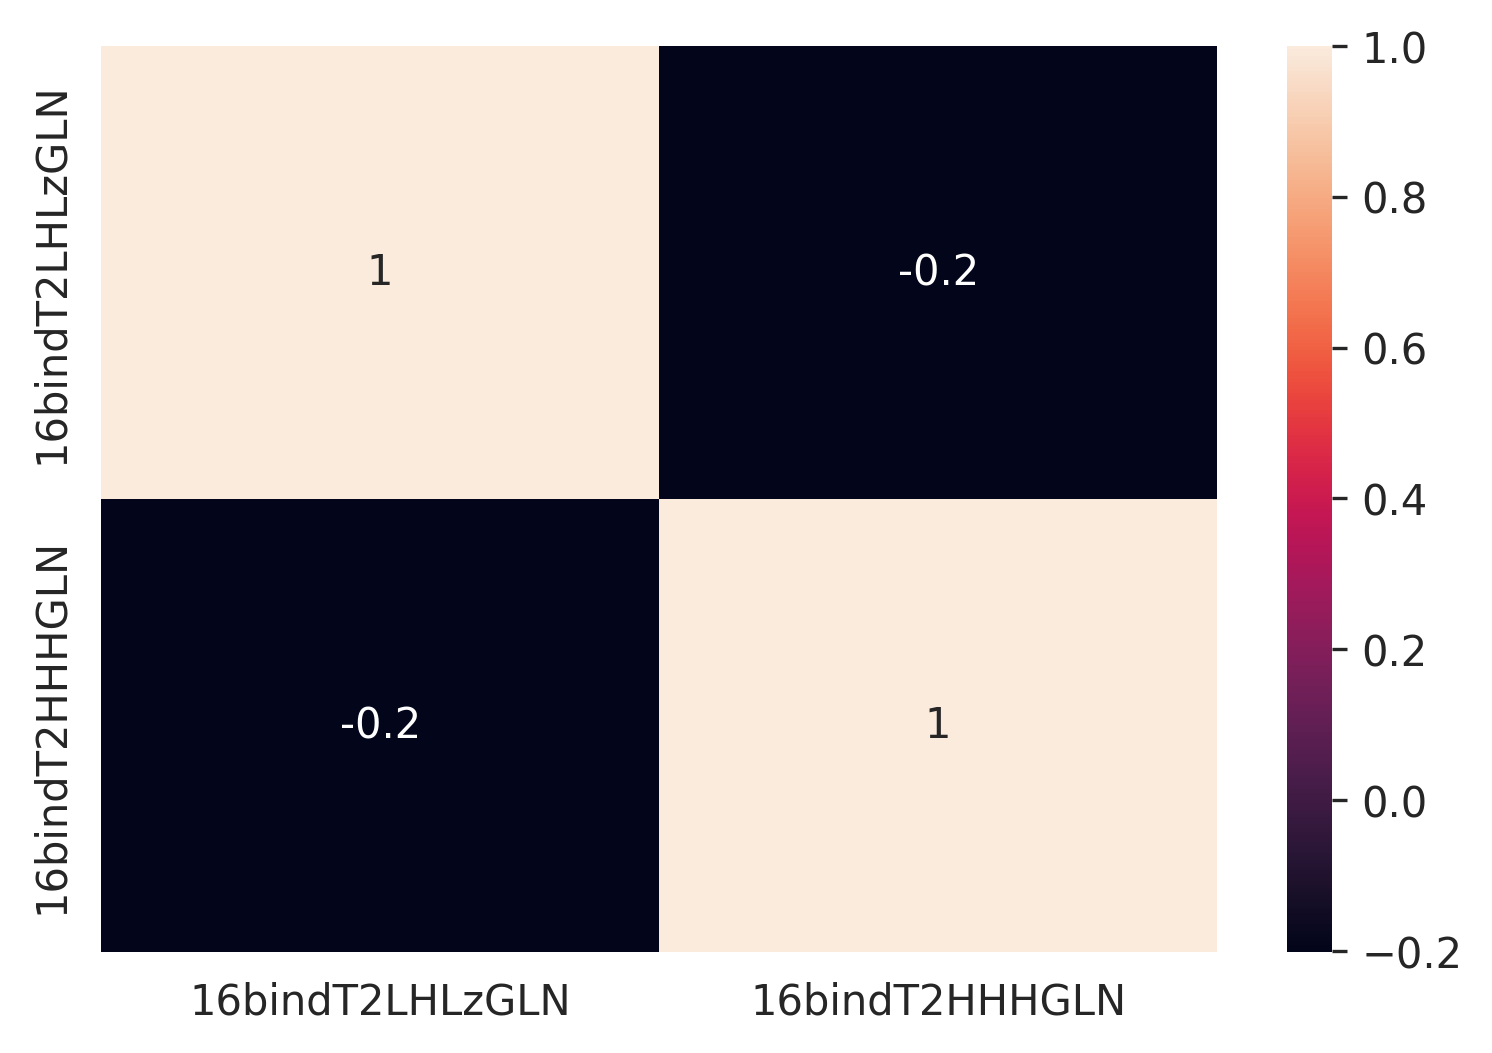

In [66]:
final_2=pd.concat([dfT2[T2_common_colums],dfT2['type']],axis=1)
plt.figure(dpi=300)
hm = np.corrcoef(final_2[final_2.columns[:-1]].T)
print(hm)
sns.heatmap(hm, annot=True, xticklabels=final_2.columns[:-1], yticklabels=final_2.columns[:-1])

In [67]:
np.savetxt('correlationT2.txt',hm)

<AxesSubplot:>

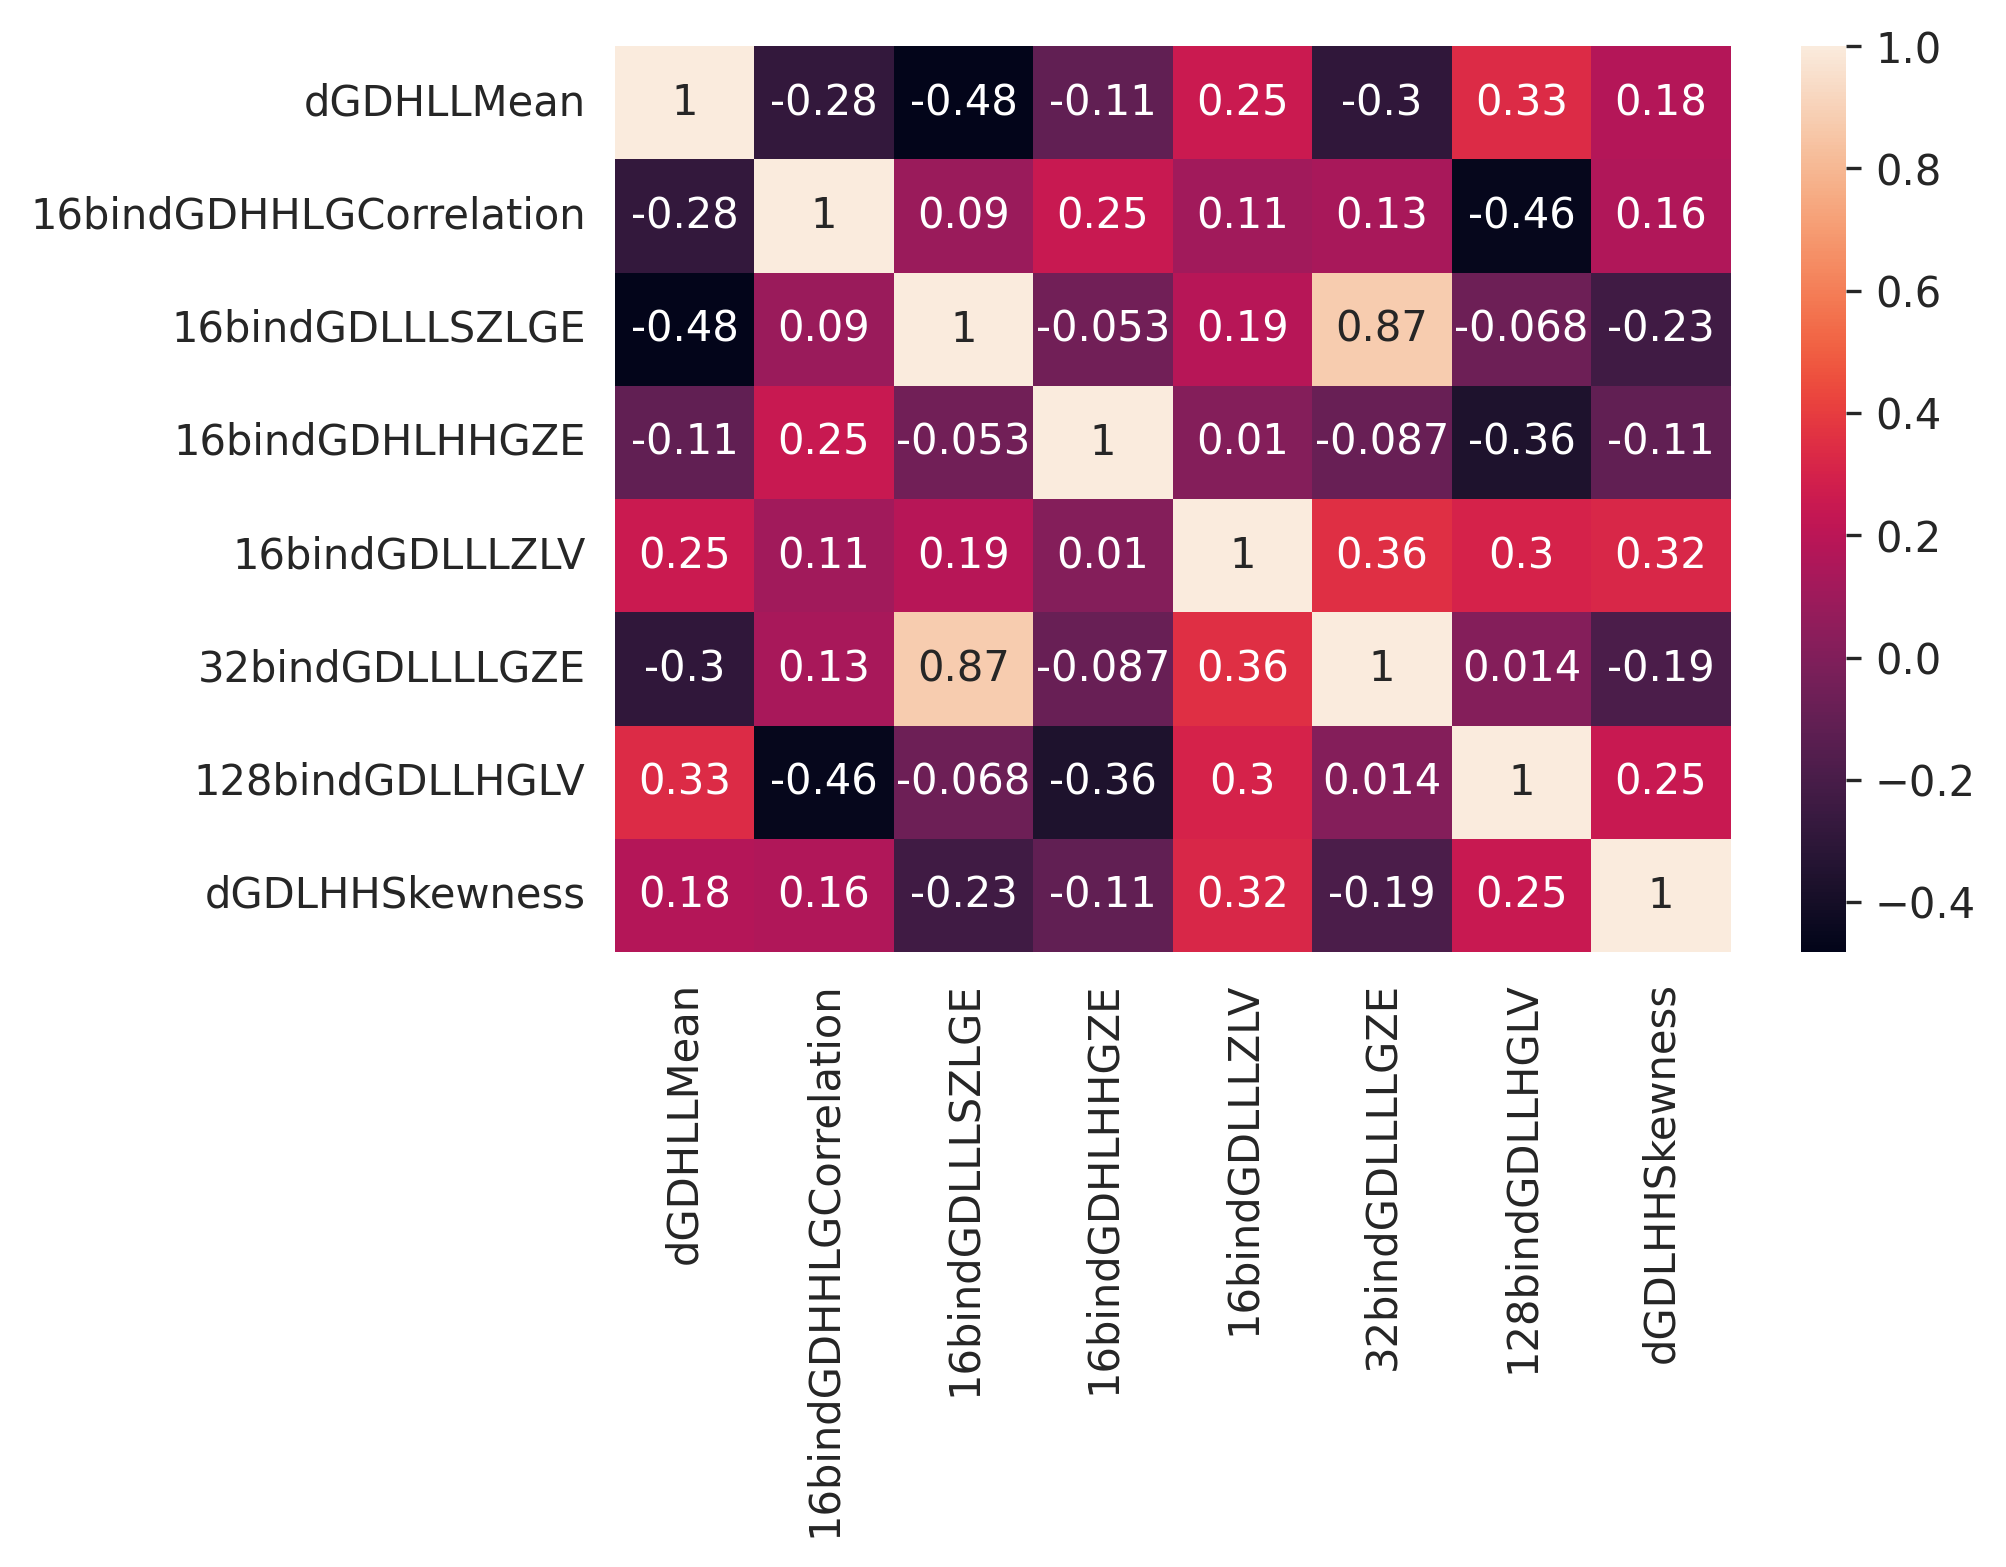

In [68]:
final_2=pd.concat([dfGD[GD_common_colums],dfGD['type']],axis=1)
plt.figure(dpi=300)
hm = np.corrcoef(final_2[final_2.columns[:-1]].T)
sns.heatmap(hm, annot=True, xticklabels=final_2.columns[:-1], yticklabels=final_2.columns[:-1])

In [69]:
np.savetxt('correlationGd.txt',hm)

<AxesSubplot:>

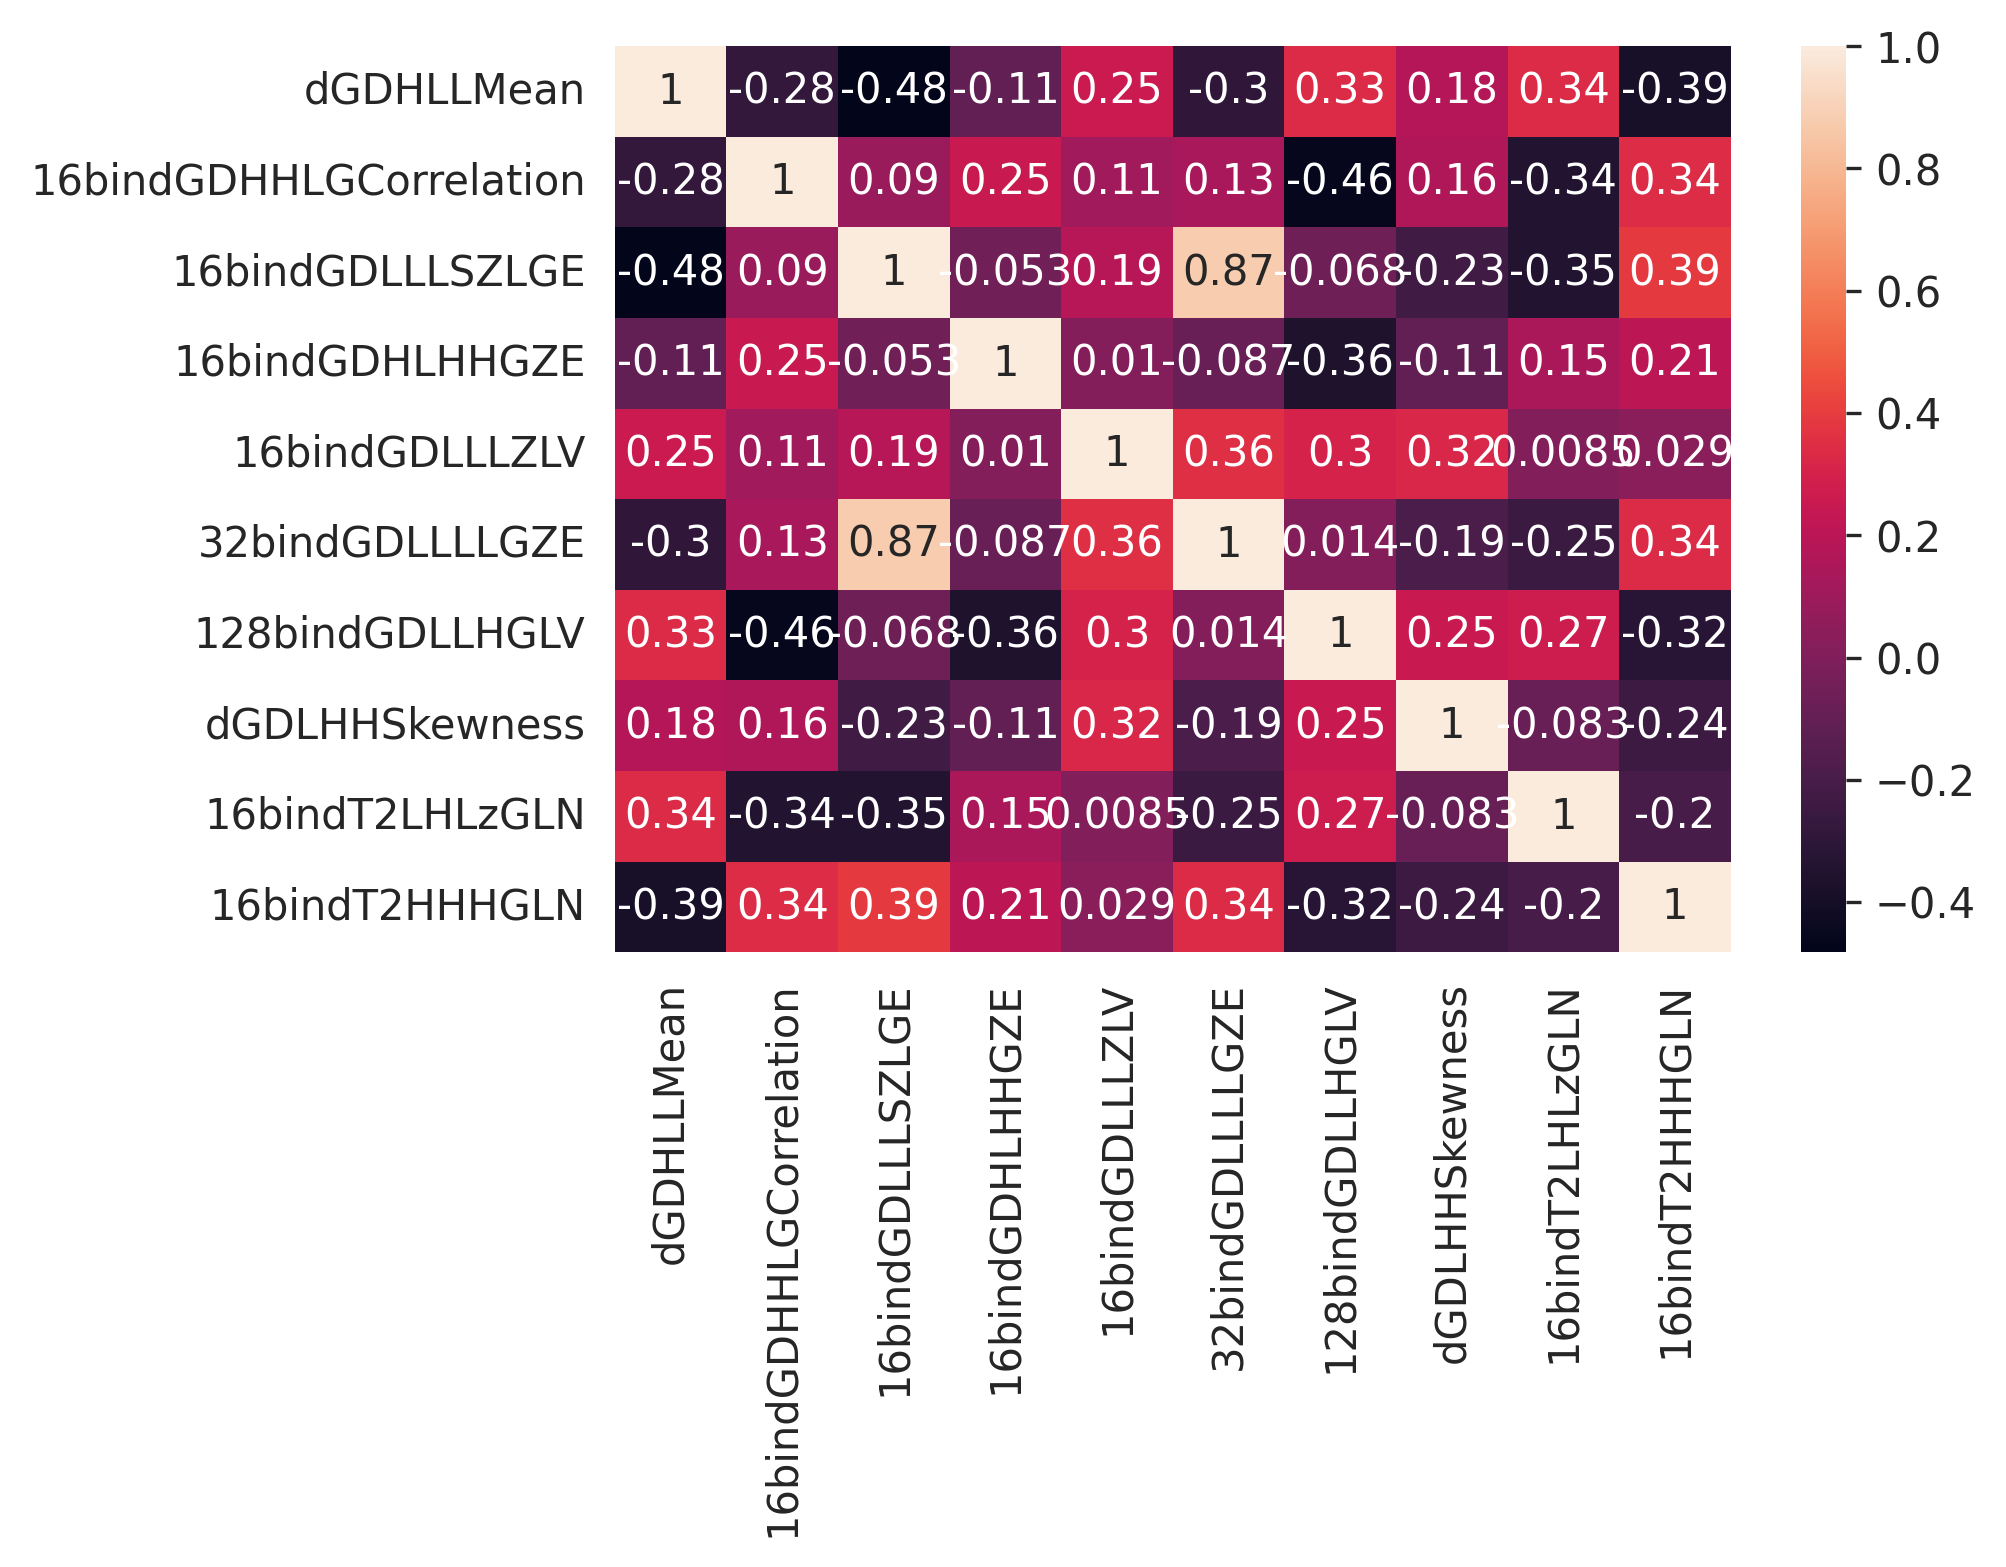

In [70]:
final_2=pd.concat([dall[GD_common_colums+T2_common_colums],dall['type']],axis=1)
plt.figure(dpi=300)
hm = np.corrcoef(final_2[final_2.columns[:-1]].T)
sns.heatmap(hm, annot=True, xticklabels=final_2.columns[:-1], yticklabels=final_2.columns[:-1])

[[ 1.         -0.20101667  0.33732327 -0.34384286 -0.34500973  0.14874035
   0.00847864 -0.253588    0.26751422 -0.0830682 ]
 [-0.20101667  1.         -0.38782672  0.34492495  0.39008203  0.20876209
   0.02882601  0.33538269 -0.32109756 -0.23977836]
 [ 0.33732327 -0.38782672  1.         -0.28240602 -0.48208934 -0.10946399
   0.25482633 -0.29516665  0.33498507  0.17748139]
 [-0.34384286  0.34492495 -0.28240602  1.          0.09041301  0.24836524
   0.1100464   0.13469991 -0.46381532  0.16186551]
 [-0.34500973  0.39008203 -0.48208934  0.09041301  1.         -0.05347938
   0.18668285  0.87467704 -0.06767732 -0.22790369]
 [ 0.14874035  0.20876209 -0.10946399  0.24836524 -0.05347938  1.
   0.01043785 -0.0873279  -0.36497749 -0.10746624]
 [ 0.00847864  0.02882601  0.25482633  0.1100464   0.18668285  0.01043785
   1.          0.35693119  0.30100217  0.32110773]
 [-0.253588    0.33538269 -0.29516665  0.13469991  0.87467704 -0.0873279
   0.35693119  1.          0.01367043 -0.19001724]
 [ 0.2675

<AxesSubplot:>

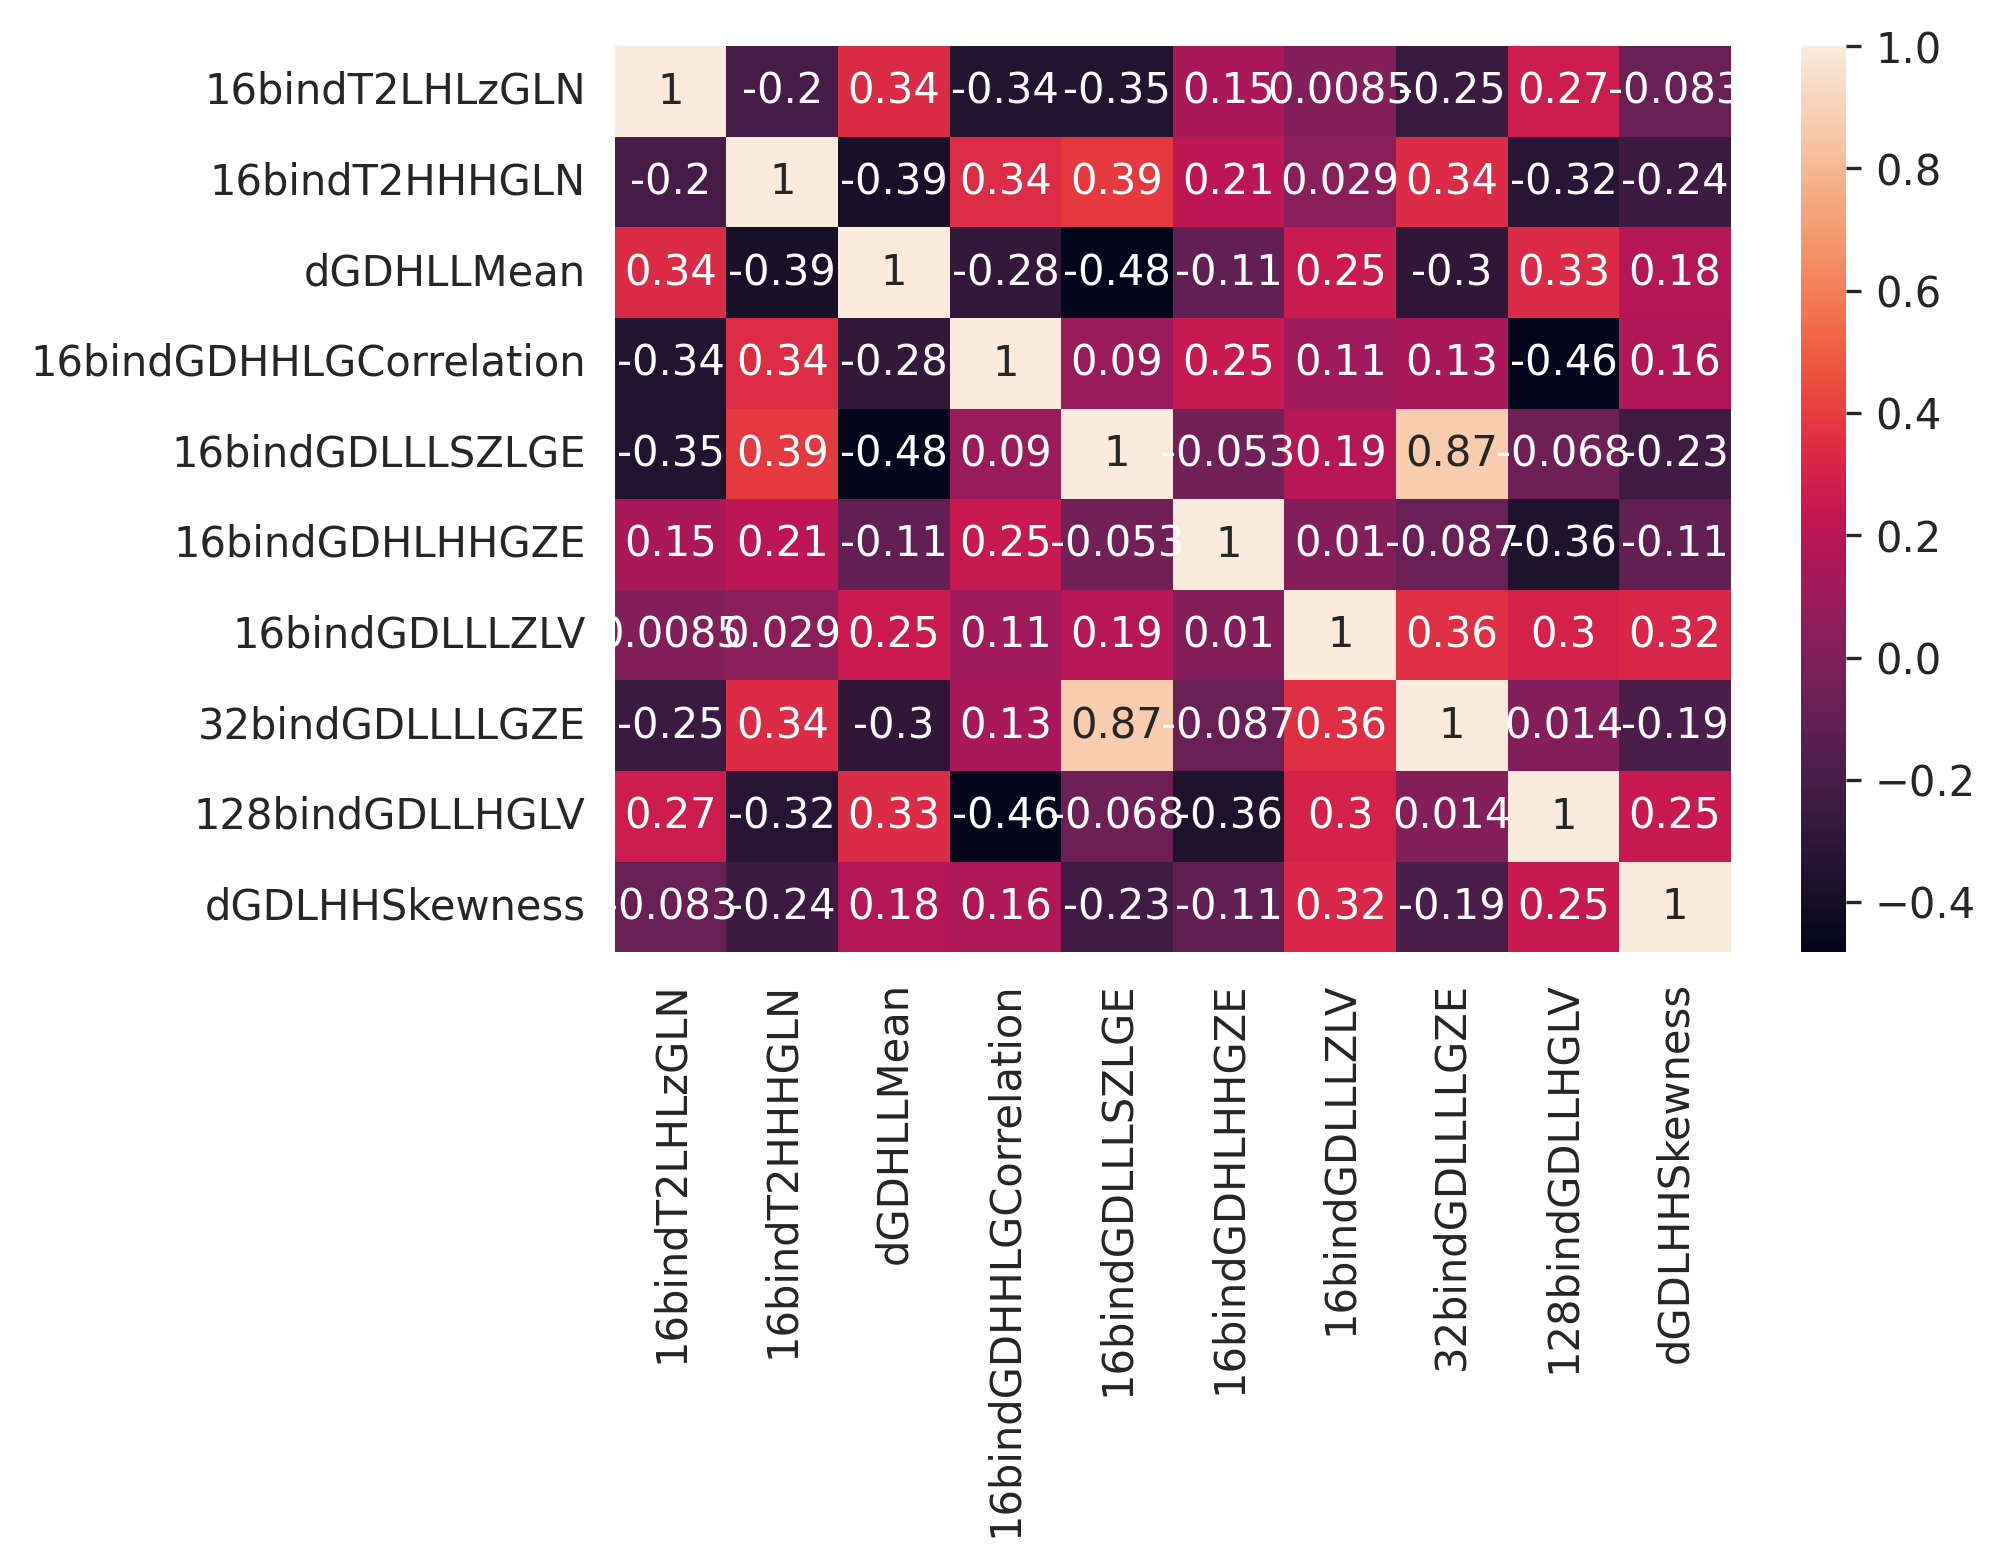

In [71]:
final_2=pd.concat([dall[all_common_colums],dall['type']],axis=1)
plt.figure(dpi=300)
hm = np.corrcoef(final_2[final_2.columns[:-1]].T)
print(hm)
sns.heatmap(hm, annot=True, xticklabels=final_2.columns[:-1], yticklabels=final_2.columns[:-1])

In [72]:
np.savetxt('correlationAll.csv',hm,delimiter=',')

Here, one of the correlation coefficients with an absolute value of 0.7 or more is removed.
'16bindGDLLLSZLGE' was removed.


In [73]:
T2_common_colums=['16bindT2LHLzGLN','16bindT2HHHGLN']
GD_common_colums=['dGDHLLMean', '16bindGDHHLGCorrelation', '16bindGDHLHHGZE', '16bindGDLLLZLV', '32bindGDLLLLGZE', '128bindGDLLHGLV',
'dGDLHHSkewness']
all_common_colums=['16bindT2LHLzGLN','16bindT2HHHGLN', 'dGDHLLMean', '16bindGDHHLGCorrelation', '16bindGDHLHHGZE', '16bindGDLLLZLV', '32bindGDLLLLGZE', '128bindGDLLHGLV',
'dGDLHHSkewness']

[[ 1.         -0.20101667]
 [-0.20101667  1.        ]]


<AxesSubplot:>

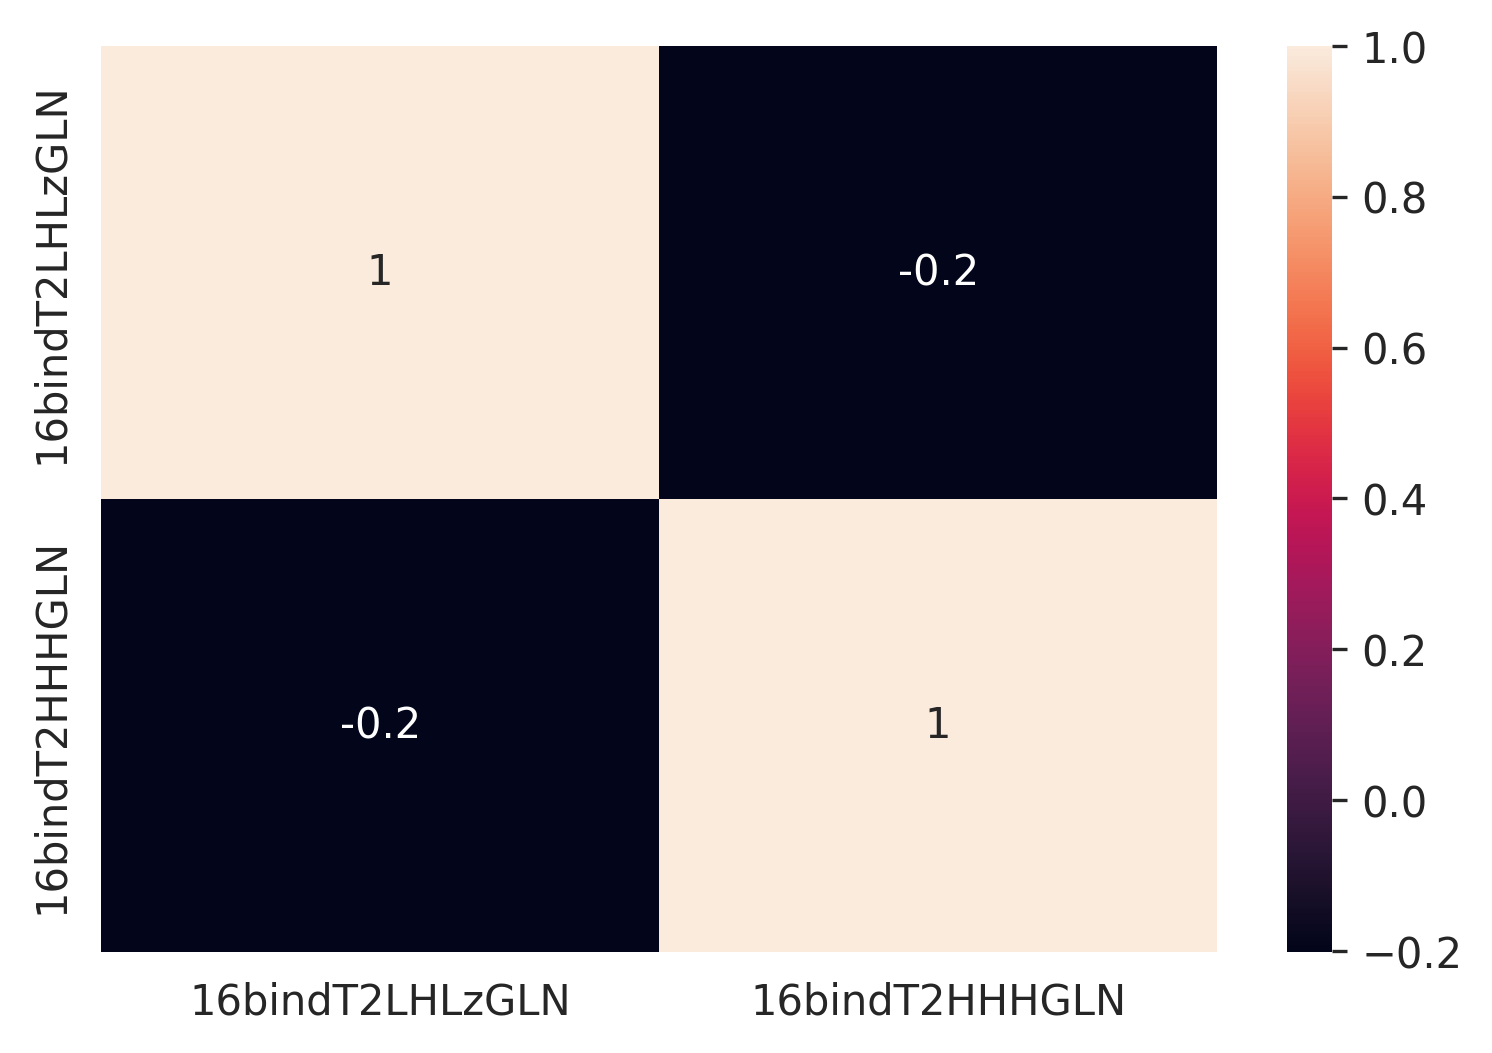

In [74]:
final_2=pd.concat([dfT2[T2_common_colums],dfT2['type']],axis=1)
plt.figure(dpi=300)
hm = np.corrcoef(final_2[final_2.columns[:-1]].T)
print(hm)
sns.heatmap(hm, annot=True, xticklabels=final_2.columns[:-1], yticklabels=final_2.columns[:-1])

In [75]:
np.savetxt('correlationT2.txt',hm)

<AxesSubplot:>

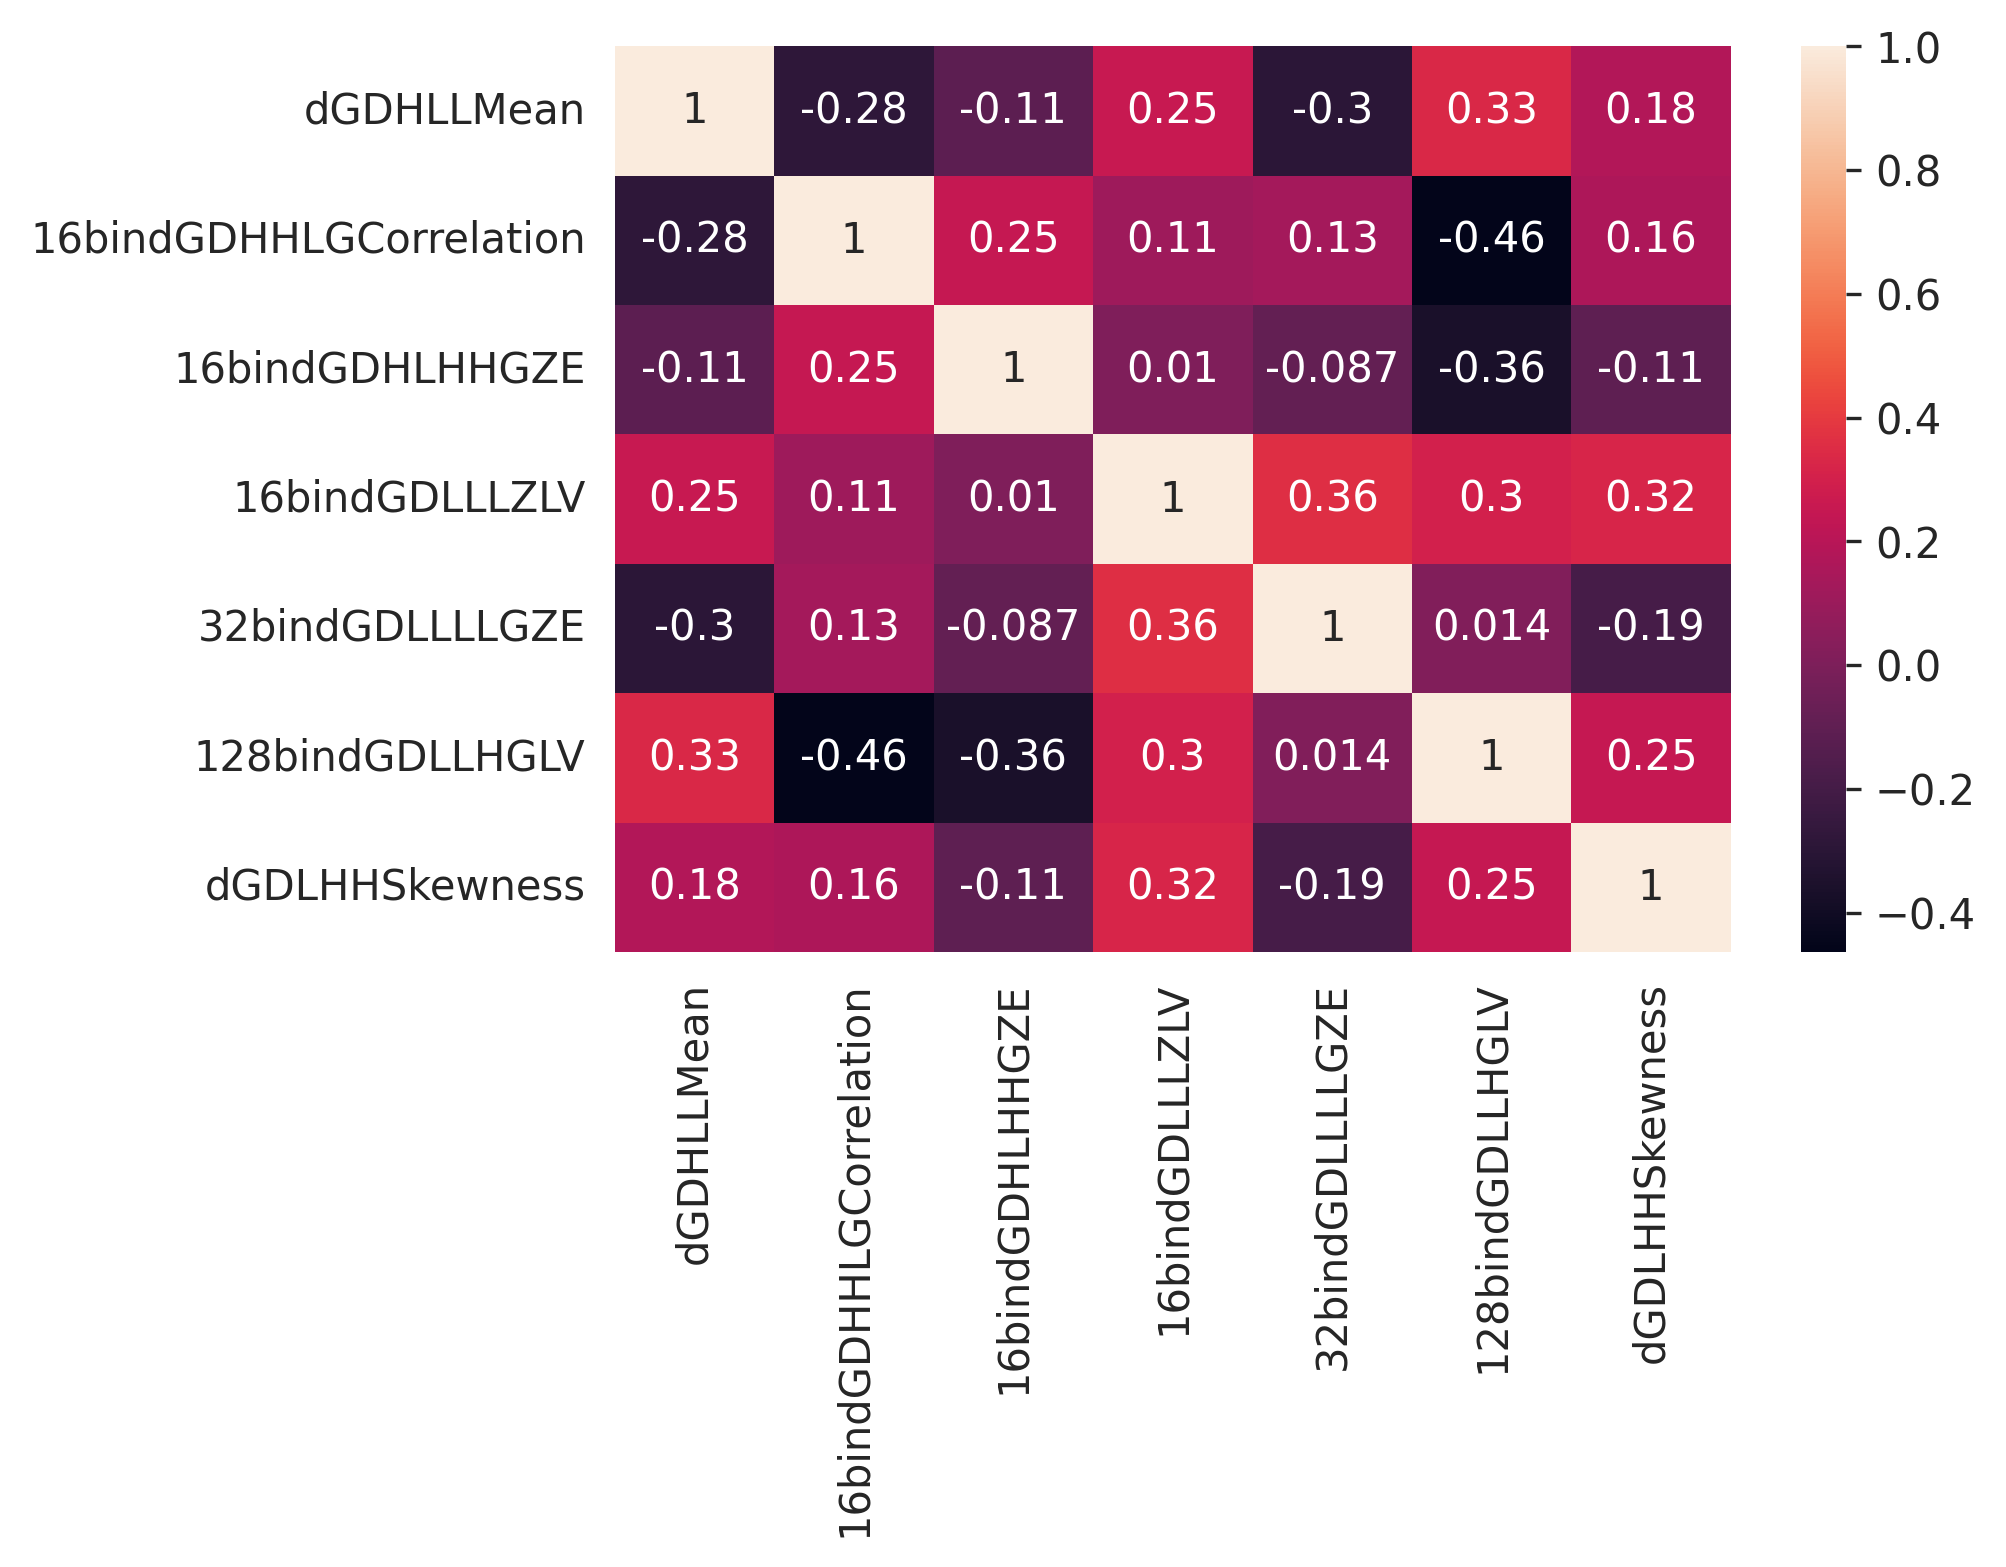

In [76]:
final_2=pd.concat([dfGD[GD_common_colums],dfGD['type']],axis=1)
plt.figure(dpi=300)
hm = np.corrcoef(final_2[final_2.columns[:-1]].T)
sns.heatmap(hm, annot=True, xticklabels=final_2.columns[:-1], yticklabels=final_2.columns[:-1])

In [77]:
np.savetxt('correlationGd.txt',hm)

<AxesSubplot:>

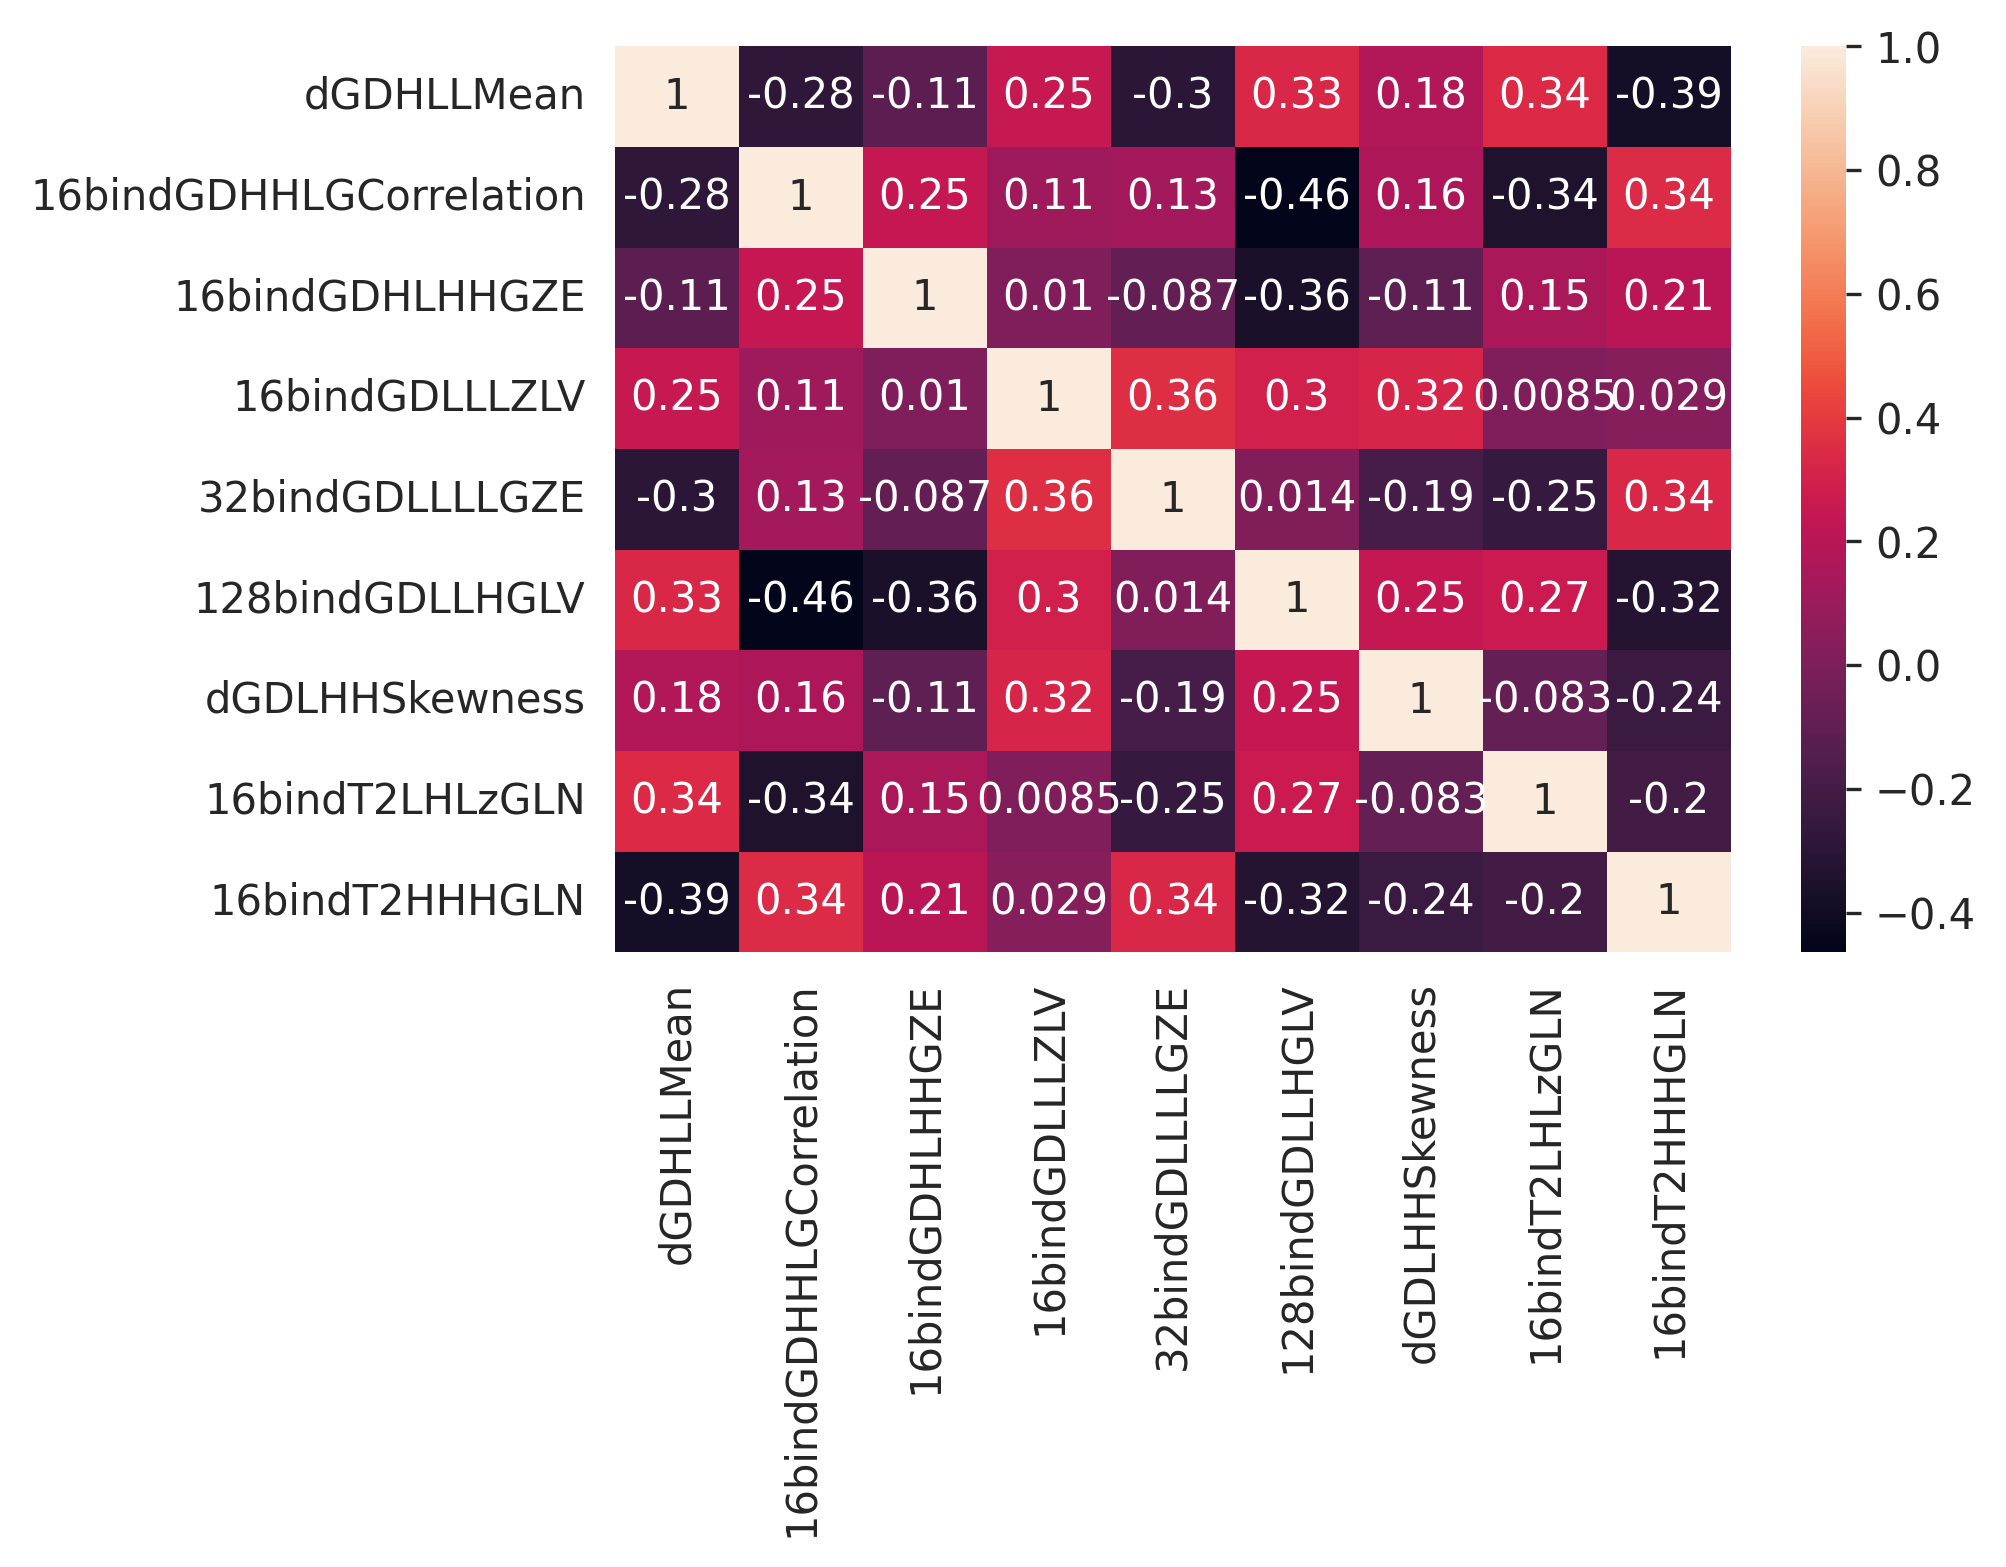

In [78]:
final_2=pd.concat([dall[GD_common_colums+T2_common_colums],dall['type']],axis=1)
plt.figure(dpi=300)
hm = np.corrcoef(final_2[final_2.columns[:-1]].T)
sns.heatmap(hm, annot=True, xticklabels=final_2.columns[:-1], yticklabels=final_2.columns[:-1])

[[ 1.         -0.20101667  0.33732327 -0.34384286  0.14874035  0.00847864
  -0.253588    0.26751422 -0.0830682 ]
 [-0.20101667  1.         -0.38782672  0.34492495  0.20876209  0.02882601
   0.33538269 -0.32109756 -0.23977836]
 [ 0.33732327 -0.38782672  1.         -0.28240602 -0.10946399  0.25482633
  -0.29516665  0.33498507  0.17748139]
 [-0.34384286  0.34492495 -0.28240602  1.          0.24836524  0.1100464
   0.13469991 -0.46381532  0.16186551]
 [ 0.14874035  0.20876209 -0.10946399  0.24836524  1.          0.01043785
  -0.0873279  -0.36497749 -0.10746624]
 [ 0.00847864  0.02882601  0.25482633  0.1100464   0.01043785  1.
   0.35693119  0.30100217  0.32110773]
 [-0.253588    0.33538269 -0.29516665  0.13469991 -0.0873279   0.35693119
   1.          0.01367043 -0.19001724]
 [ 0.26751422 -0.32109756  0.33498507 -0.46381532 -0.36497749  0.30100217
   0.01367043  1.          0.24850372]
 [-0.0830682  -0.23977836  0.17748139  0.16186551 -0.10746624  0.32110773
  -0.19001724  0.24850372  1.  

<AxesSubplot:>

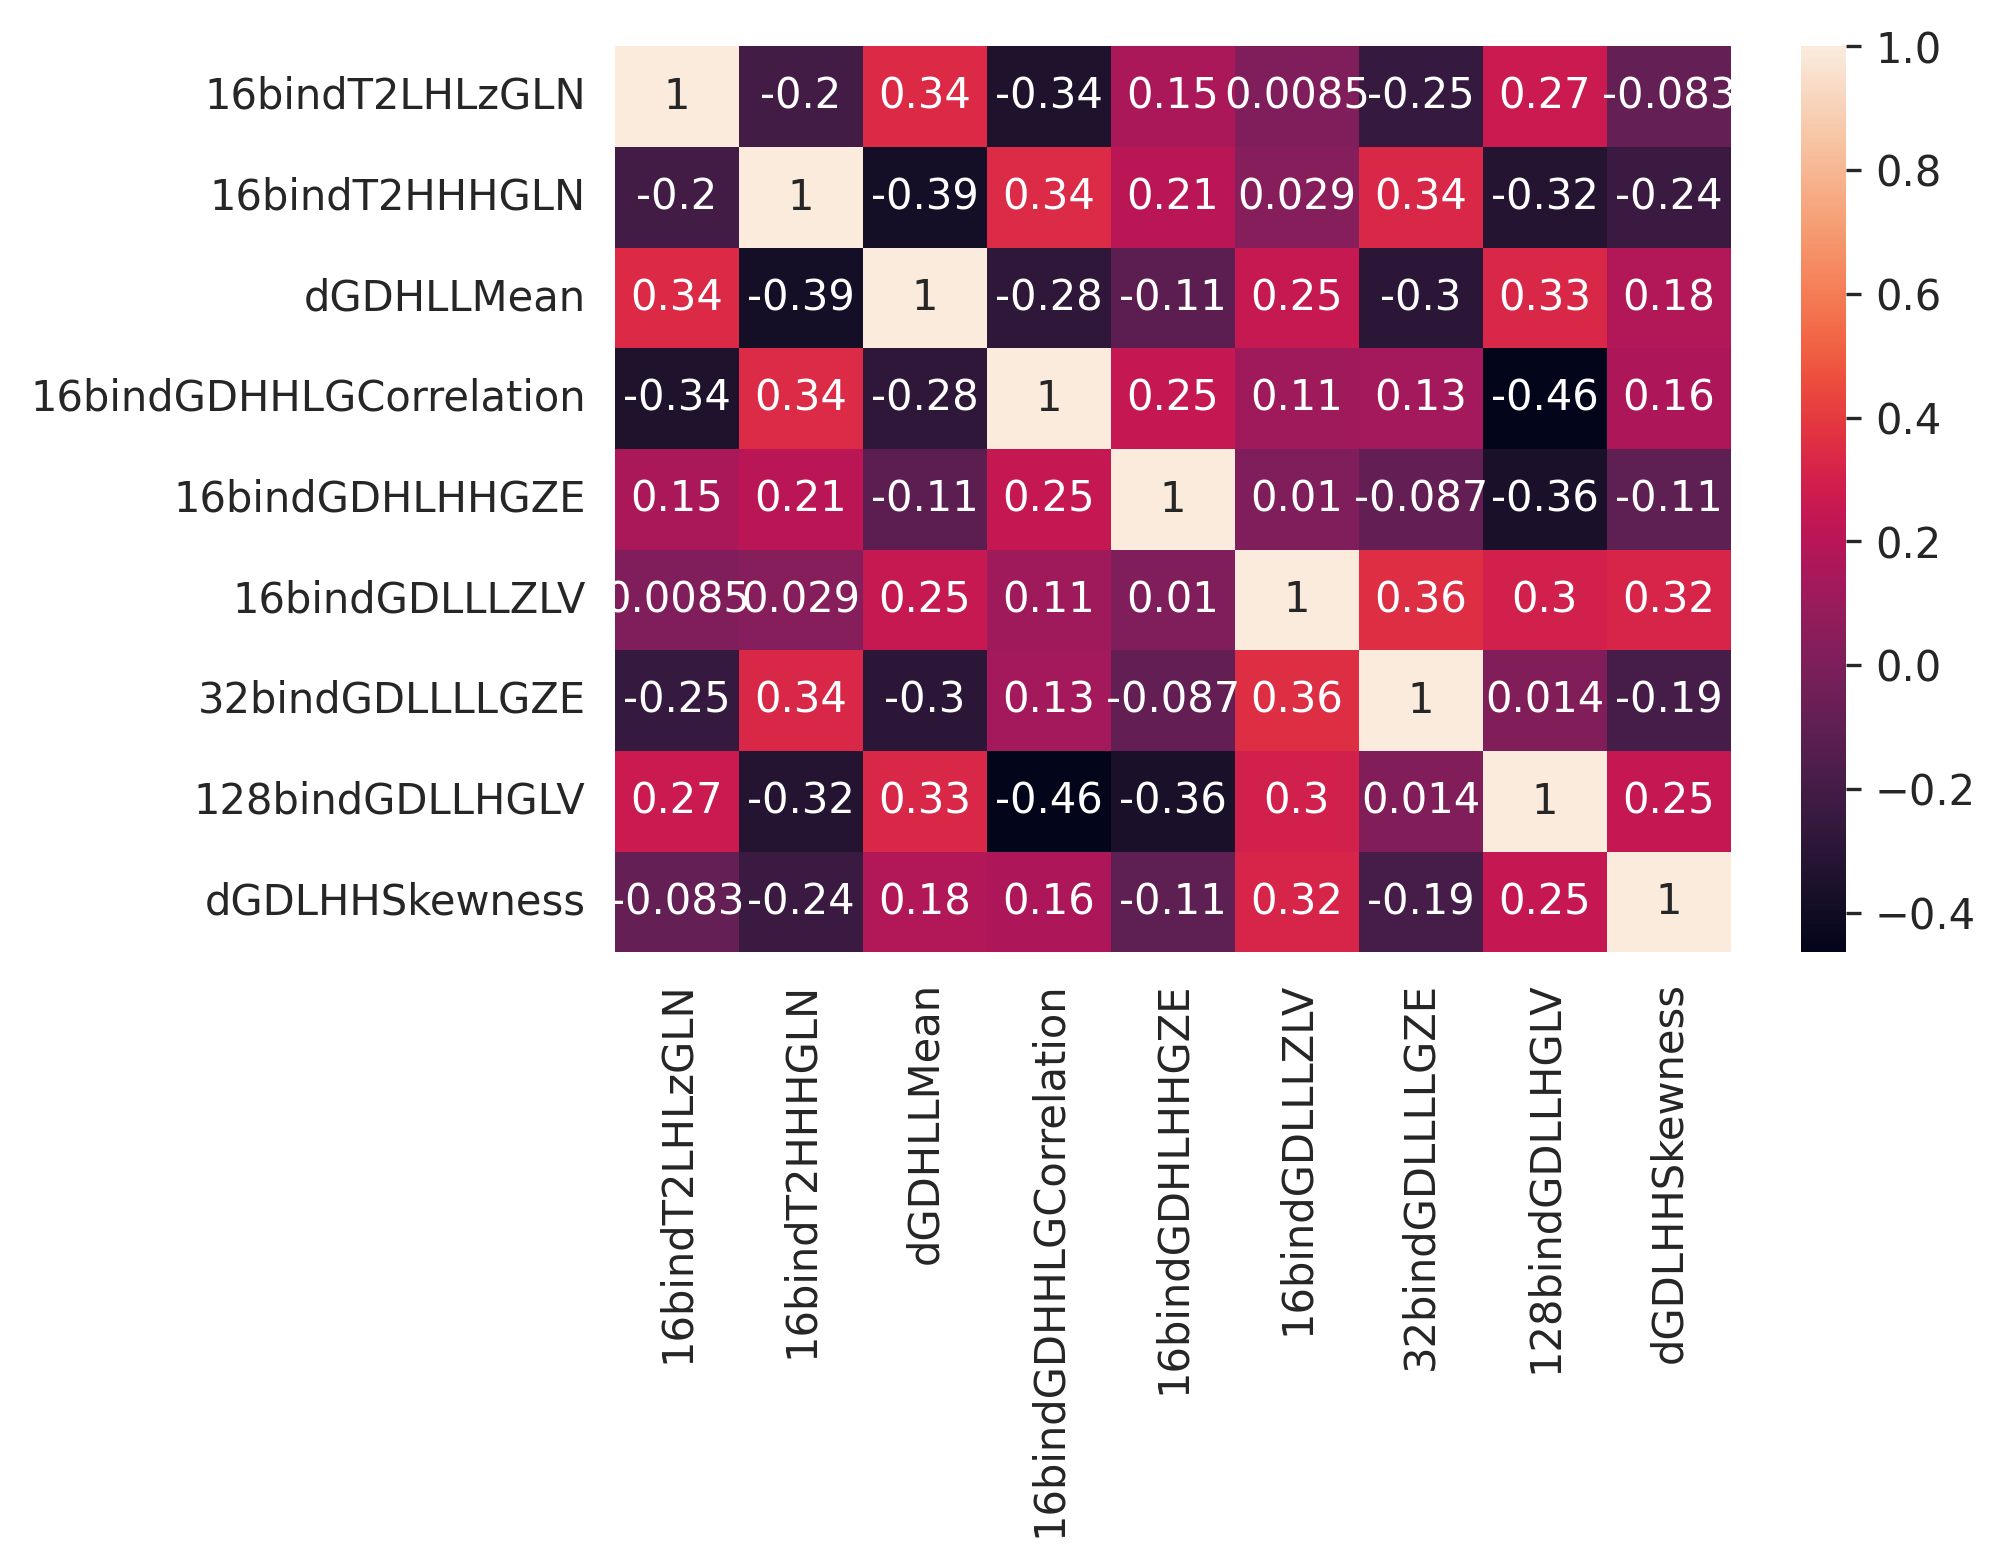

In [79]:
final_2=pd.concat([dall[all_common_colums],dall['type']],axis=1)
plt.figure(dpi=300)
hm = np.corrcoef(final_2[final_2.columns[:-1]].T)
print(hm)
sns.heatmap(hm, annot=True, xticklabels=final_2.columns[:-1], yticklabels=final_2.columns[:-1])

# the END 